In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats import boxcox
from scipy.special import inv_boxcox

#Visualization
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')
%matplotlib inline

import sklearn.linear_model as linear_model
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import lightgbm as lgb
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, KFold,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,PowerTransformer
from sklearn.ensemble import GradientBoostingRegressor,StackingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA


# Feature Scaling
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

# Scalers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle



from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax




from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error


import scipy.stats as stats

import matplotlib.style as style
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import missingno as msno

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_rows', 5000)


import os
for dirname, _, filenames in os.walk('/Users/tuktuk/Downloads/house-prices-advanced-regression-techniques'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/Users/tuktuk/Downloads/house-prices-advanced-regression-techniques/submission23Sep1.csv
/Users/tuktuk/Downloads/house-prices-advanced-regression-techniques/submission22Sep.csv
/Users/tuktuk/Downloads/house-prices-advanced-regression-techniques/submission23Sep2.csv
/Users/tuktuk/Downloads/house-prices-advanced-regression-techniques/submissionpycarat.csv
/Users/tuktuk/Downloads/house-prices-advanced-regression-techniques/submission22Sep1.csv
/Users/tuktuk/Downloads/house-prices-advanced-regression-techniques/test.csv
/Users/tuktuk/Downloads/house-prices-advanced-regression-techniques/data_description.txt
/Users/tuktuk/Downloads/house-prices-advanced-regression-techniques/train.csv
/Users/tuktuk/Downloads/house-prices-advanced-regression-techniques/sample_submission.csv
/Users/tuktuk/Downloads/house-prices-advanced-regression-techniques/XGBsubmission.csv


In [3]:
## Import Training data. 
train = pd.read_csv("/Users/tuktuk/Downloads/house-prices-advanced-regression-techniques/train.csv")

In [4]:
test = pd.read_csv("/Users/tuktuk/Downloads/house-prices-advanced-regression-techniques/test.csv")

In [5]:
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [6]:
data = (train, test) # to perform actions on both datasets

In [7]:
# To perform actions on both sets together ( for data imputation and encoding)
train_test=pd.concat([train,test],axis=0,sort=False)
#train_test.head()

In [8]:
#(train.dtypes).value_counts(), (test.dtypes).value_counts(),(train_test.dtypes).value_counts()

### Finding Numerical (continuous and discrete) and Categorical Features

In [39]:
# list of numerical variables

num_vars = [var for var in train_test.columns if train_test[var].dtypes != 'O' and var not in ['Id','SalePrice' ]]
print('Number of numerical variables: ', num_vars, len(num_vars))

Number of numerical variables:  ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPo

In [40]:
#list of discrete variables

discrete_vars = [var for var in num_vars if len(train_test[var].unique())<20 and var not in ['Id','SalePrice']]
print('Number of discrete variables: ', discrete_vars, len(discrete_vars))

Number of discrete variables:  ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'Total_Bath', 'exists_pool', 'exists_IstFl', 'exists_2ndFl', 'exists_garage', 'exists_fireplace', 'exists_bsmt', 'old_house'] 65


In [41]:
# list of continuous variables

cont_vars = [var for var in num_vars if var not in discrete_vars+['Id','SalePrice']]
print('Number of continuous variables: ', cont_vars, len(cont_vars))

Number of continuous variables:  ['LotFrontage', 'LotArea', 'Neighborhood', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'YrBltRmd', 'Total_Square_Feet', 'Total_Porch_Area', 'House_Age1', 'House_Age2'] 27


In [12]:
### Categorical variables

cat_vars = [var for var in train_test.columns if train_test[var].dtypes=='O']
print('Number of categorical variables: ', cat_vars, len(cat_vars))

Number of categorical variables:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] 43


In [13]:
# Checking cardianility
for var in cat_vars:
    print(var, "---------", len(train[var].unique()), ' categories')

MSZoning --------- 5  categories
Street --------- 2  categories
Alley --------- 3  categories
LotShape --------- 4  categories
LandContour --------- 4  categories
Utilities --------- 2  categories
LotConfig --------- 5  categories
LandSlope --------- 3  categories
Neighborhood --------- 25  categories
Condition1 --------- 9  categories
Condition2 --------- 8  categories
BldgType --------- 5  categories
HouseStyle --------- 8  categories
RoofStyle --------- 6  categories
RoofMatl --------- 8  categories
Exterior1st --------- 15  categories
Exterior2nd --------- 16  categories
MasVnrType --------- 5  categories
ExterQual --------- 4  categories
ExterCond --------- 5  categories
Foundation --------- 6  categories
BsmtQual --------- 5  categories
BsmtCond --------- 5  categories
BsmtExposure --------- 5  categories
BsmtFinType1 --------- 7  categories
BsmtFinType2 --------- 7  categories
Heating --------- 6  categories
HeatingQC --------- 5  categories
CentralAir --------- 2  categories
El

In [14]:
# Lets check range and unique values
# discrete data unique values
for var in discrete_vars:
    print(var, train_test[var].unique())

MSSubClass [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40 150]
OverallQual [ 7  6  8  5  9  4 10  3  1  2]
OverallCond [5 8 6 7 4 2 3 9 1]
BsmtFullBath [ 1.  0.  2.  3. nan]
BsmtHalfBath [ 0.  1.  2. nan]
FullBath [2 1 3 0 4]
HalfBath [1 0 2]
BedroomAbvGr [3 4 1 2 0 5 6 8]
KitchenAbvGr [1 2 3 0]
TotRmsAbvGrd [ 8  6  7  9  5 11  4 10 12  3  2 14 13 15]
Fireplaces [0 1 2 3 4]
GarageCars [ 2.  3.  1.  0.  4.  5. nan]
PoolArea [  0 512 648 576 555 480 519 738 144 368 444 228 561 800]
MoSold [ 2  5  9 12 10  8 11  4  1  7  3  6]
YrSold [2008 2007 2006 2009 2010]


In [15]:
# continuous data range in train and test
for dataset in data:    
    for var in cont_vars:
        print(var, dataset[var].min(),'-',dataset[var].max())

LotFrontage 21.0 - 313.0
LotArea 1300 - 215245
YearBuilt 1872 - 2010
YearRemodAdd 1950 - 2010
MasVnrArea 0.0 - 1600.0
BsmtFinSF1 0 - 5644
BsmtFinSF2 0 - 1474
BsmtUnfSF 0 - 2336
TotalBsmtSF 0 - 6110
1stFlrSF 334 - 4692
2ndFlrSF 0 - 2065
LowQualFinSF 0 - 572
GrLivArea 334 - 5642
GarageYrBlt 1900.0 - 2010.0
GarageArea 0 - 1418
WoodDeckSF 0 - 857
OpenPorchSF 0 - 547
EnclosedPorch 0 - 552
3SsnPorch 0 - 508
ScreenPorch 0 - 480
MiscVal 0 - 15500
LotFrontage 21.0 - 200.0
LotArea 1470 - 56600
YearBuilt 1879 - 2010
YearRemodAdd 1950 - 2010
MasVnrArea 0.0 - 1290.0
BsmtFinSF1 0.0 - 4010.0
BsmtFinSF2 0.0 - 1526.0
BsmtUnfSF 0.0 - 2140.0
TotalBsmtSF 0.0 - 5095.0
1stFlrSF 407 - 5095
2ndFlrSF 0 - 1862
LowQualFinSF 0 - 1064
GrLivArea 407 - 5095
GarageYrBlt 1895.0 - 2207.0
GarageArea 0.0 - 1488.0
WoodDeckSF 0 - 1424
OpenPorchSF 0 - 742
EnclosedPorch 0 - 1012
3SsnPorch 0 - 360
ScreenPorch 0 - 576
MiscVal 0 - 17000


In [16]:
# in combined data
for var in cont_vars:
        print(var, train_test[var].min(),'-',train_test[var].max())

LotFrontage 21.0 - 313.0
LotArea 1300 - 215245
YearBuilt 1872 - 2010
YearRemodAdd 1950 - 2010
MasVnrArea 0.0 - 1600.0
BsmtFinSF1 0.0 - 5644.0
BsmtFinSF2 0.0 - 1526.0
BsmtUnfSF 0.0 - 2336.0
TotalBsmtSF 0.0 - 6110.0
1stFlrSF 334 - 5095
2ndFlrSF 0 - 2065
LowQualFinSF 0 - 1064
GrLivArea 334 - 5642
GarageYrBlt 1895.0 - 2207.0
GarageArea 0.0 - 1488.0
WoodDeckSF 0 - 1424
OpenPorchSF 0 - 742
EnclosedPorch 0 - 1012
3SsnPorch 0 - 508
ScreenPorch 0 - 576
MiscVal 0 - 17000


In [17]:
# categorical data range
for dataset in data:    
    for var in cat_vars:
        print(var, "------", dataset[var].unique(), '\n')

MSZoning ------ ['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street ------ ['Pave' 'Grvl'] 

Alley ------ [nan 'Grvl' 'Pave'] 

LotShape ------ ['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour ------ ['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities ------ ['AllPub' 'NoSeWa'] 

LotConfig ------ ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope ------ ['Gtl' 'Mod' 'Sev'] 

Neighborhood ------ ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1 ------ ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2 ------ ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

BldgType ------ ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle ------ ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

RoofStyle ------ ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Sh

In [18]:
for var in cont_vars:
        print(var, train_test[var].min(),'-',train_test[var].max())

LotFrontage 21.0 - 313.0
LotArea 1300 - 215245
YearBuilt 1872 - 2010
YearRemodAdd 1950 - 2010
MasVnrArea 0.0 - 1600.0
BsmtFinSF1 0.0 - 5644.0
BsmtFinSF2 0.0 - 1526.0
BsmtUnfSF 0.0 - 2336.0
TotalBsmtSF 0.0 - 6110.0
1stFlrSF 334 - 5095
2ndFlrSF 0 - 2065
LowQualFinSF 0 - 1064
GrLivArea 334 - 5642
GarageYrBlt 1895.0 - 2207.0
GarageArea 0.0 - 1488.0
WoodDeckSF 0 - 1424
OpenPorchSF 0 - 742
EnclosedPorch 0 - 1012
3SsnPorch 0 - 508
ScreenPorch 0 - 576
MiscVal 0 - 17000


### Finding missing values

In [9]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    ## the two following line may seem complicated but its actually very simple. 
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])


In [10]:
missing_percentage(train_test)

Total  Percent
PoolQC         2909    99.66
MiscFeature    2814    96.40
Alley          2721    93.22
Fence          2348    80.44
SalePrice      1459    49.98
FireplaceQu    1420    48.65
LotFrontage     486    16.65
GarageCond      159     5.45
GarageYrBlt     159     5.45
GarageQual      159     5.45
GarageFinish    159     5.45
GarageType      157     5.38
BsmtCond         82     2.81
BsmtExposure     82     2.81
BsmtQual         81     2.77
BsmtFinType2     80     2.74
BsmtFinType1     79     2.71
MasVnrType       24     0.82
MasVnrArea       23     0.79
MSZoning          4     0.14
Utilities         2     0.07
Functional        2     0.07
BsmtFullBath      2     0.07
BsmtHalfBath      2     0.07
GarageCars        1     0.03
BsmtFinSF2        1     0.03
Exterior2nd       1     0.03
GarageArea        1     0.03
TotalBsmtSF       1     0.03
BsmtUnfSF         1     0.03
BsmtFinSF1        1     0.03
Exterior1st       1     0.03
KitchenQual       1     0.03
SaleType          1     0.03
Electrical        1     0.03

In [11]:
# defining customised plots to see distribution, probability and boxplot

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

### Checking outliers in continuous variables (Visualisation)

Train LotFrontage


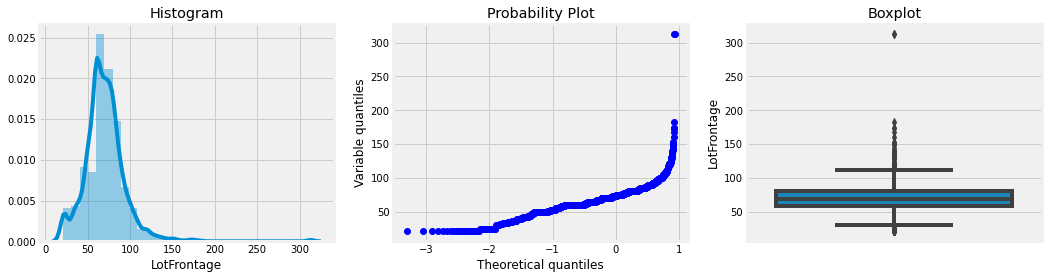

Test LotFrontage


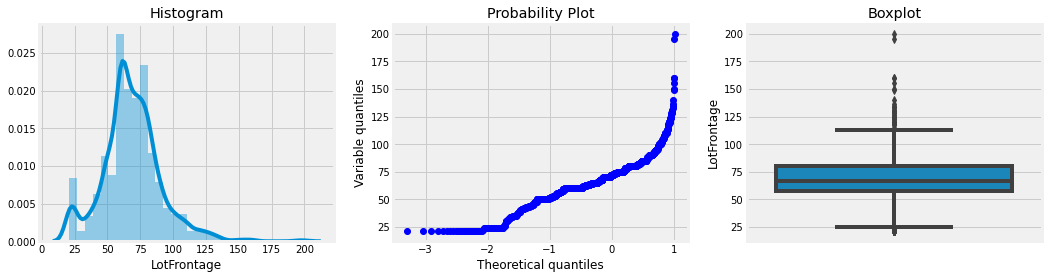

Train LotArea


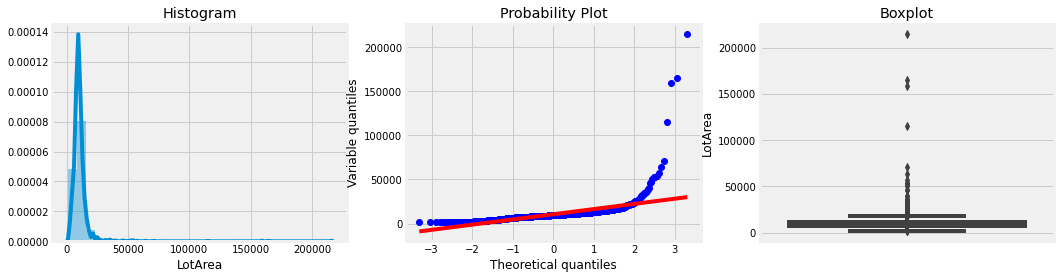

Test LotArea


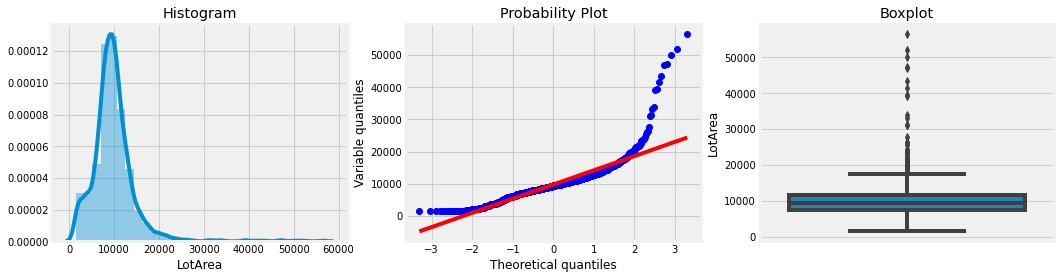

Train YearBuilt


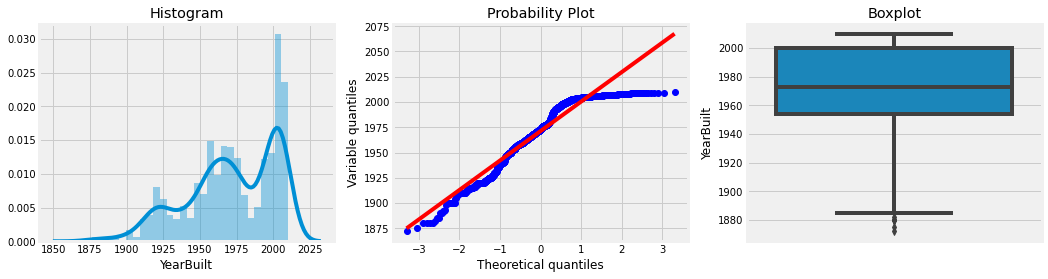

Test YearBuilt


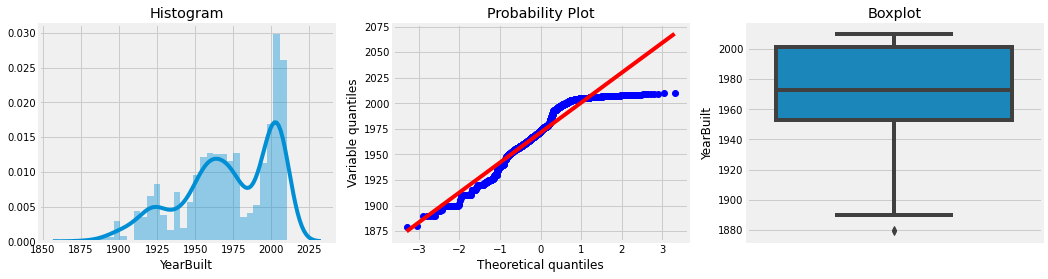

Train YearRemodAdd


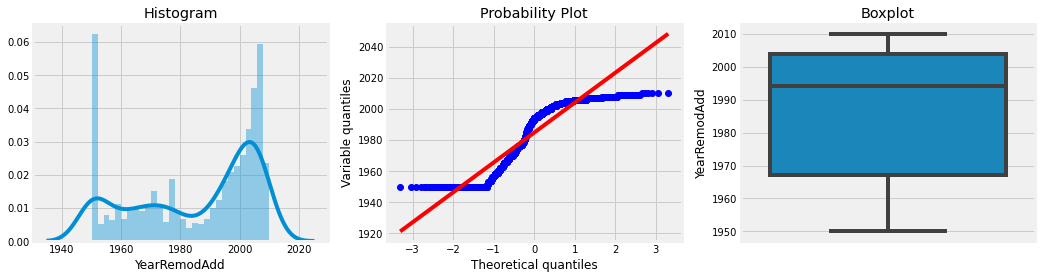

Test YearRemodAdd


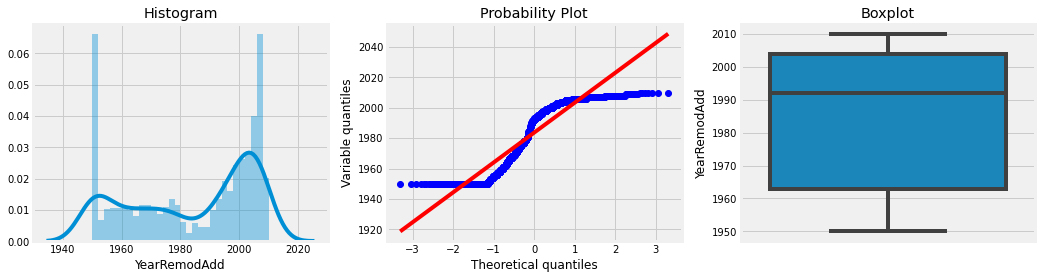

Train MasVnrArea


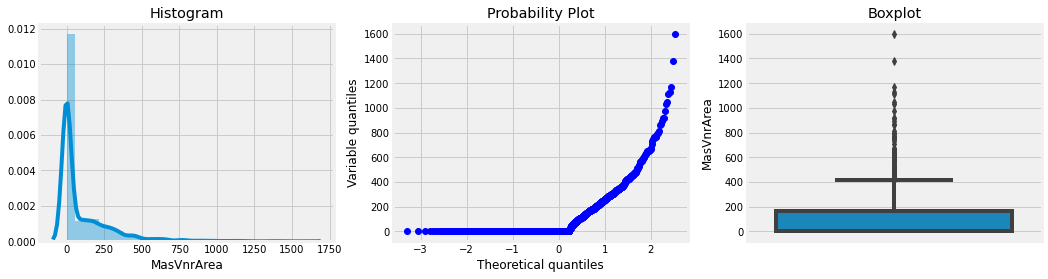

Test MasVnrArea


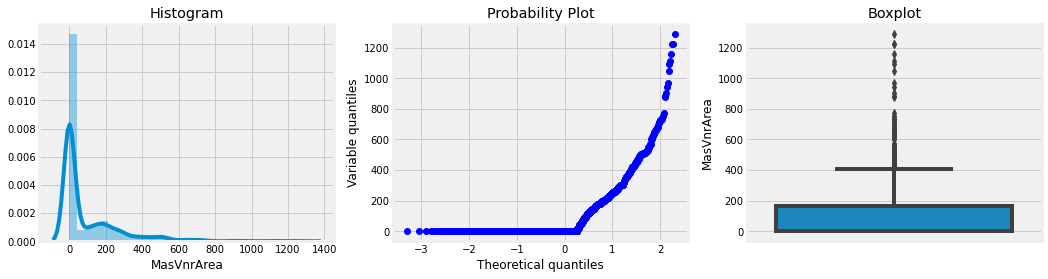

Train BsmtFinSF1


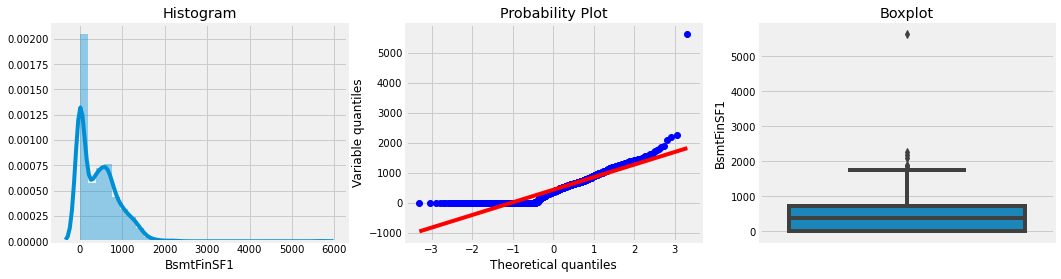

Test BsmtFinSF1


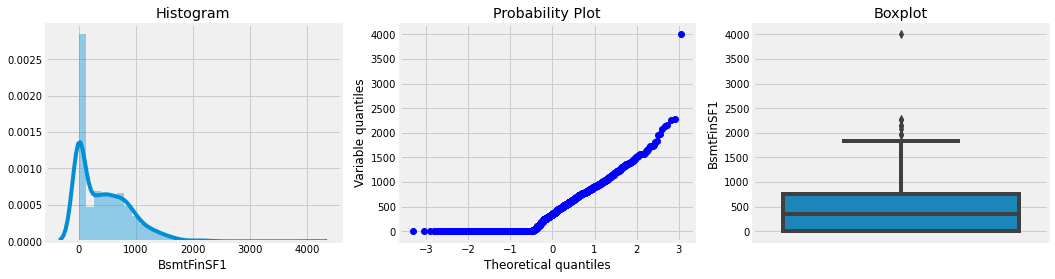

Train BsmtFinSF2


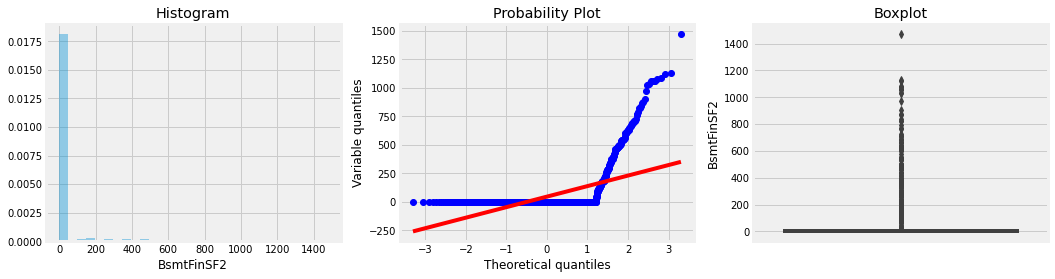

Test BsmtFinSF2


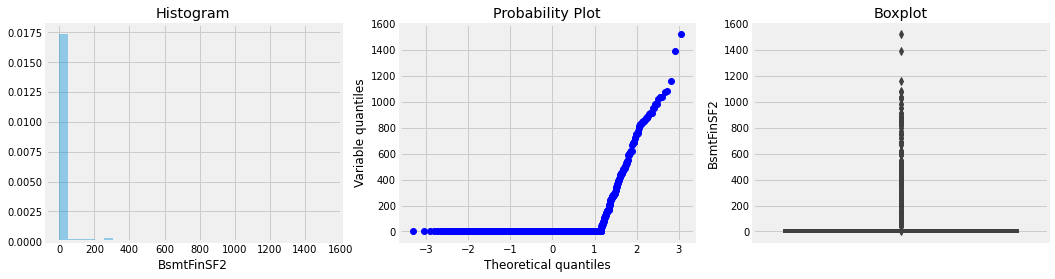

Train BsmtUnfSF


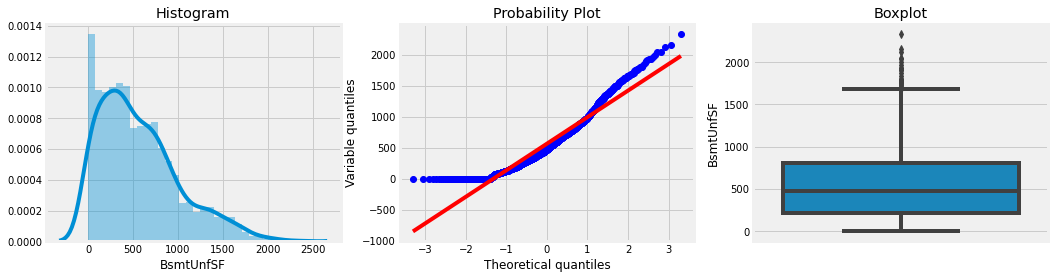

Test BsmtUnfSF


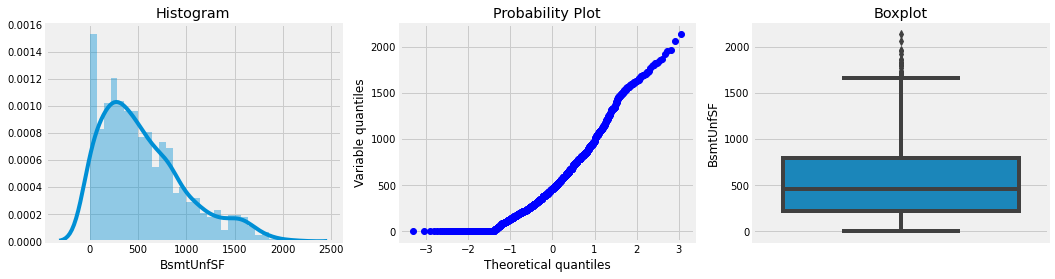

Train TotalBsmtSF


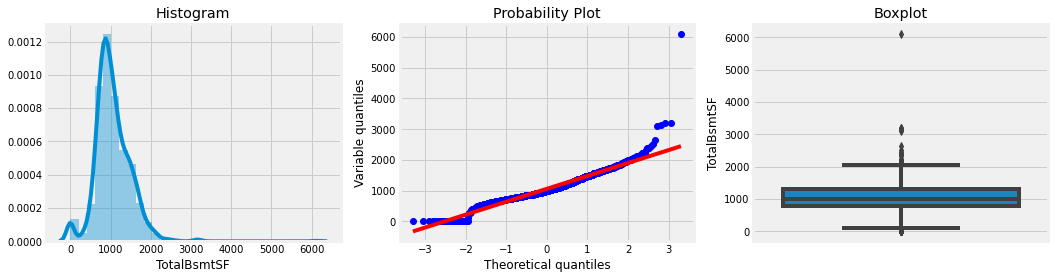

Test TotalBsmtSF


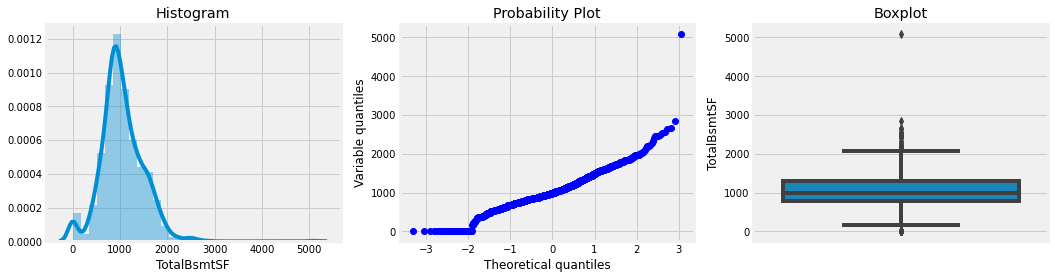

Train 1stFlrSF


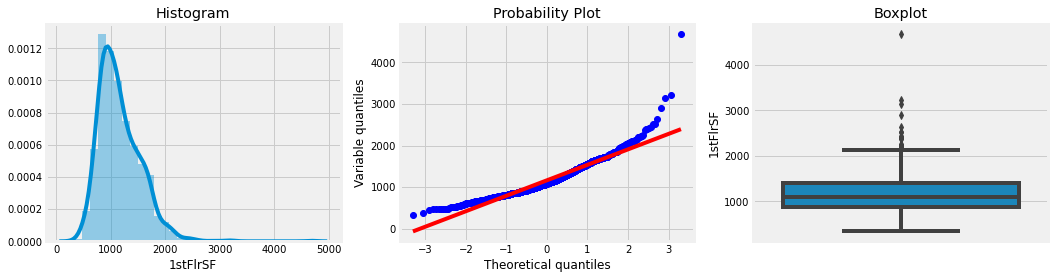

Test 1stFlrSF


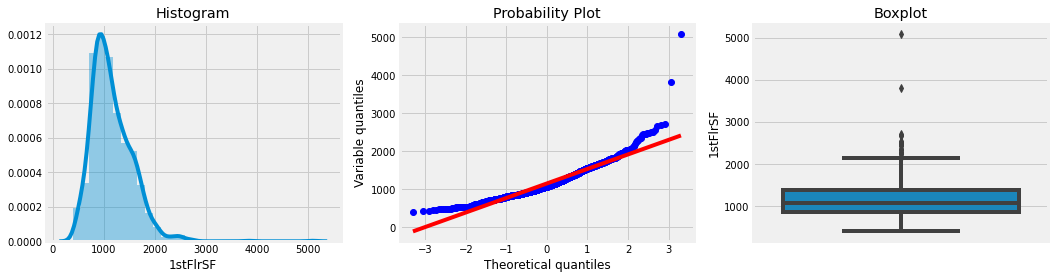

Train 2ndFlrSF


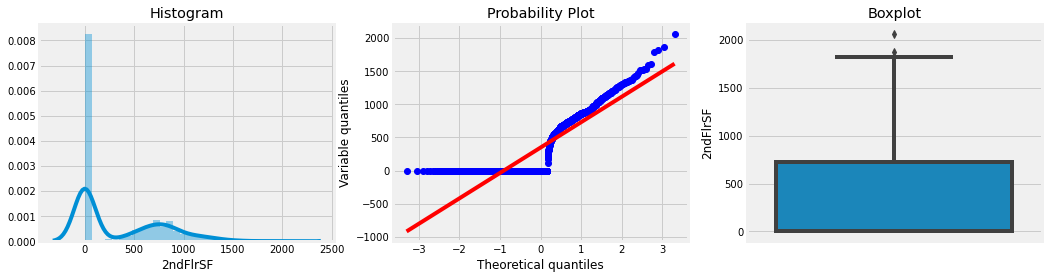

Test 2ndFlrSF


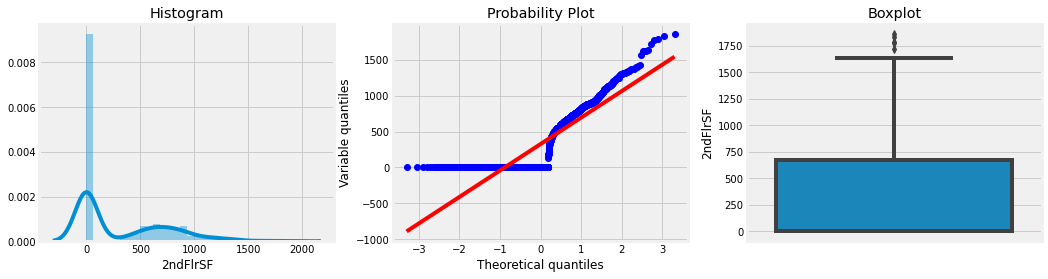

Train LowQualFinSF


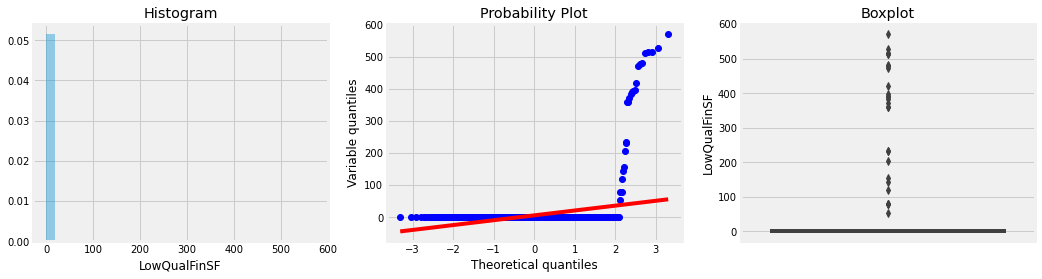

Test LowQualFinSF


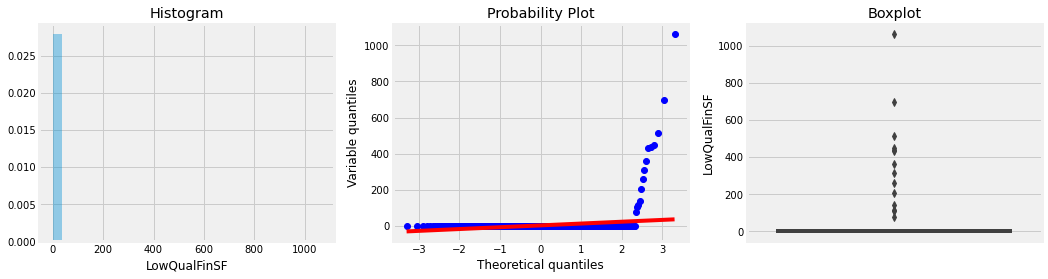

Train GrLivArea


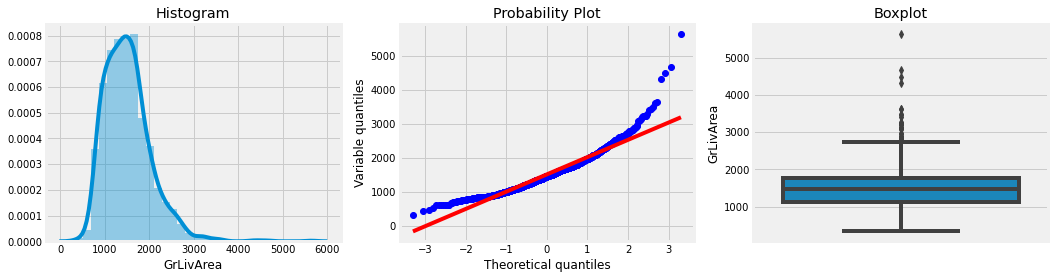

Test GrLivArea


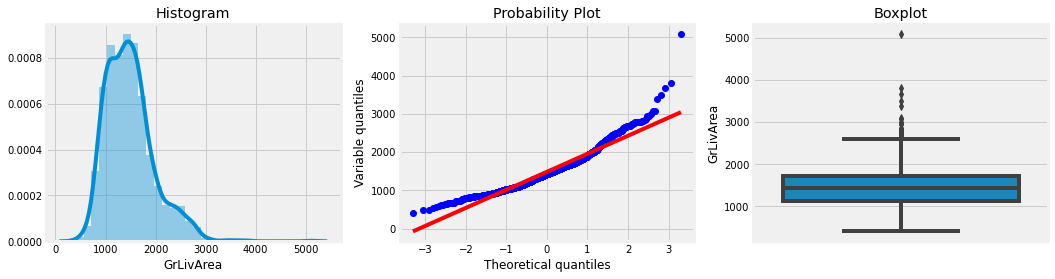

Train GarageYrBlt


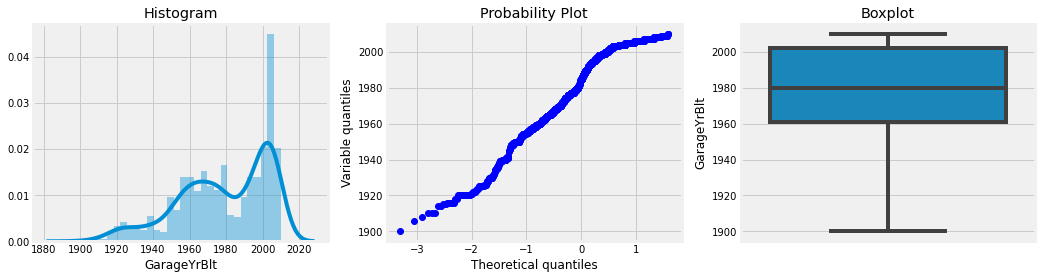

Test GarageYrBlt


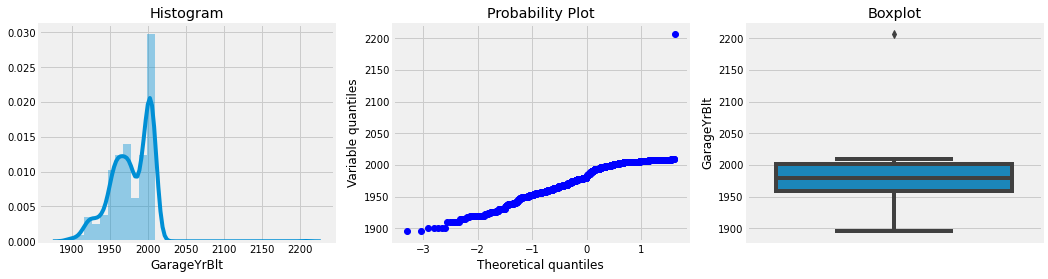

Train GarageArea


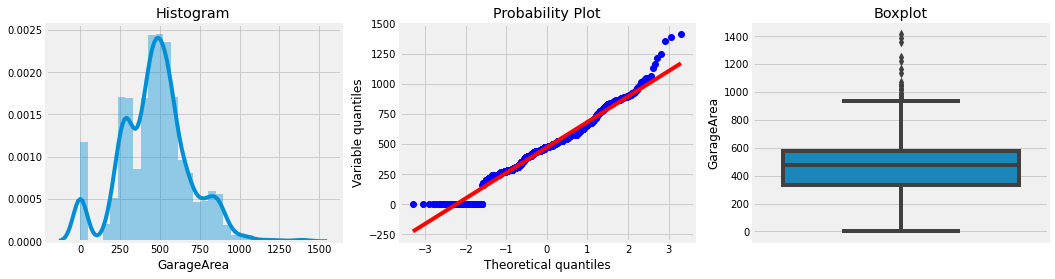

Test GarageArea


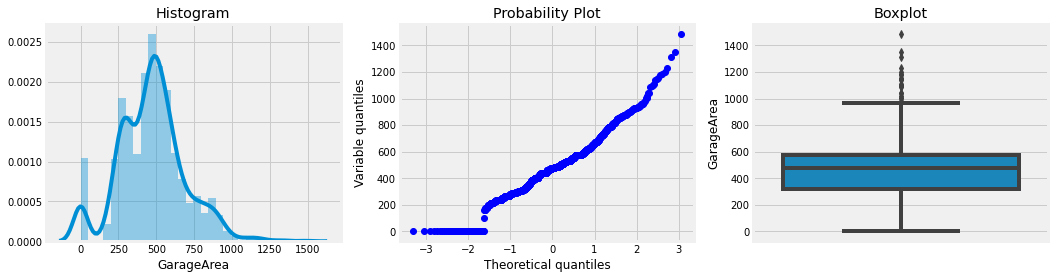

Train WoodDeckSF


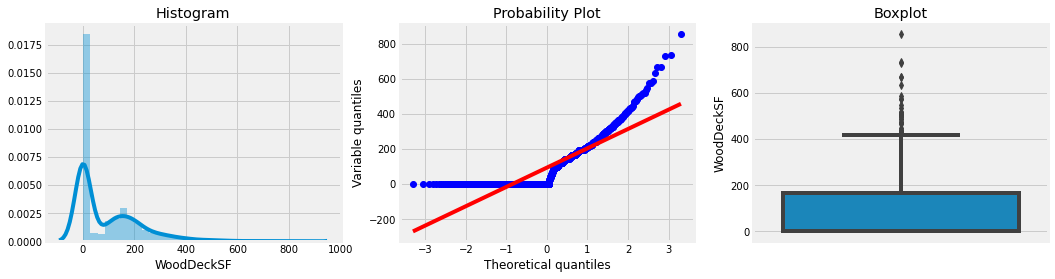

Test WoodDeckSF


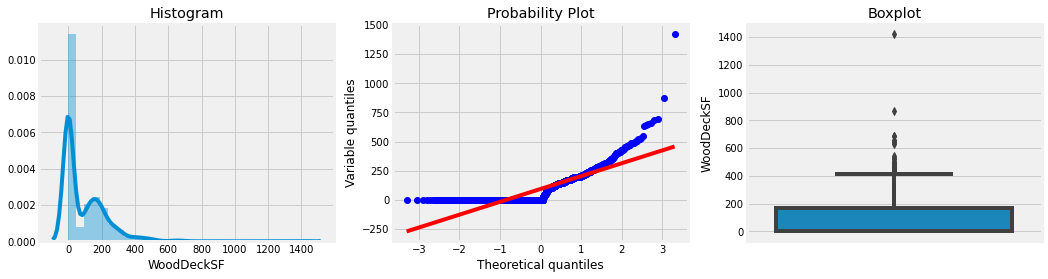

Train OpenPorchSF


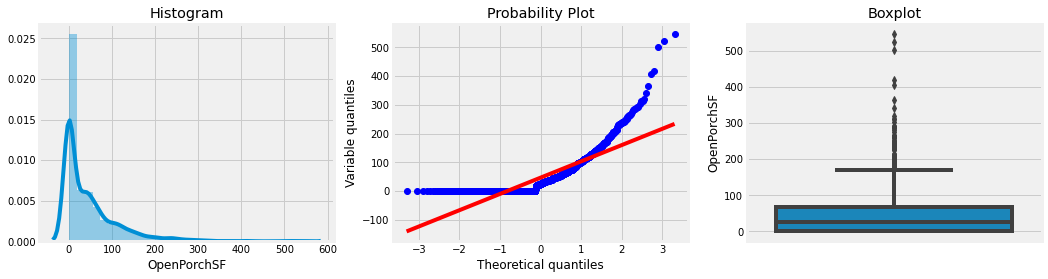

Test OpenPorchSF


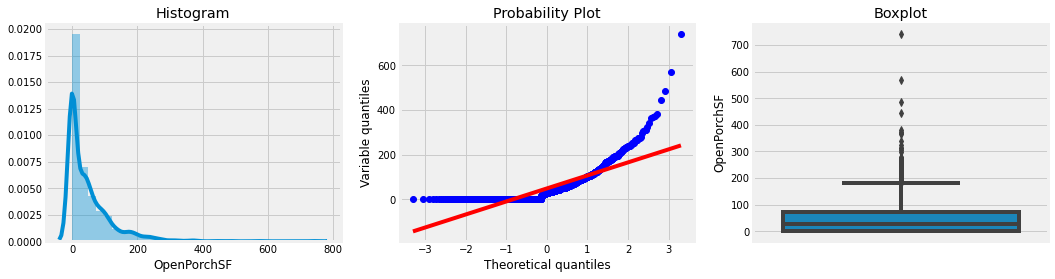

Train EnclosedPorch


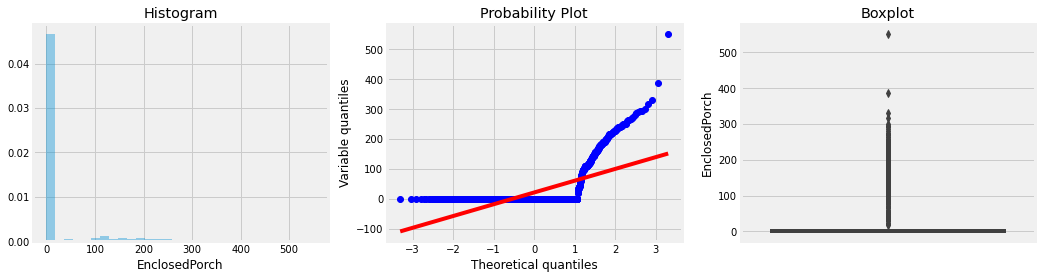

Test EnclosedPorch


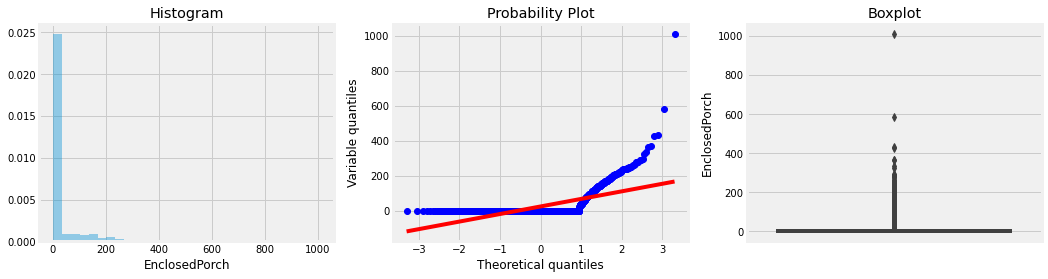

Train 3SsnPorch


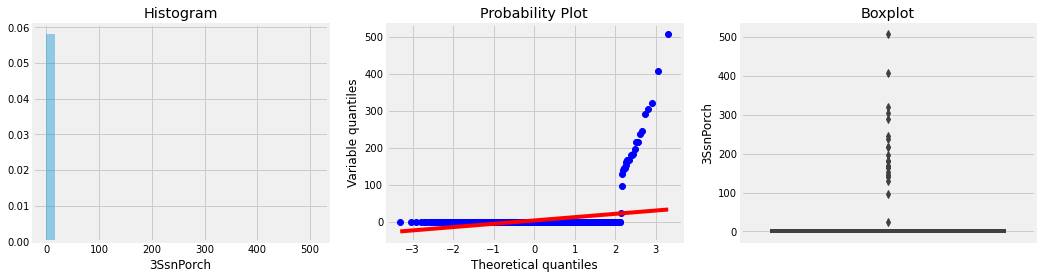

Test 3SsnPorch


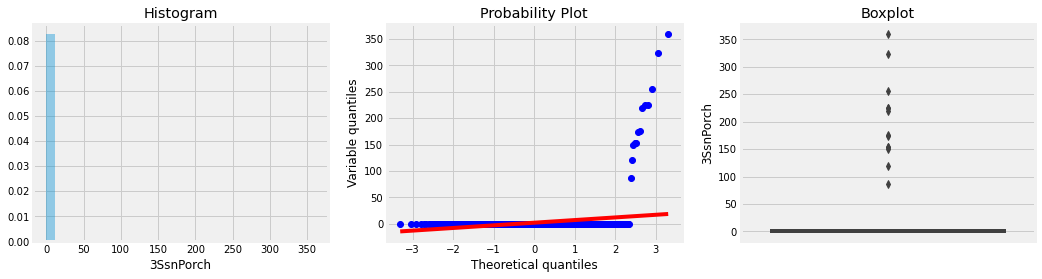

Train ScreenPorch


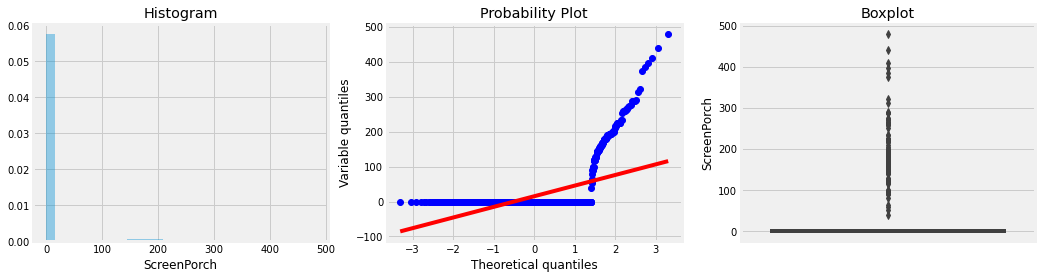

Test ScreenPorch


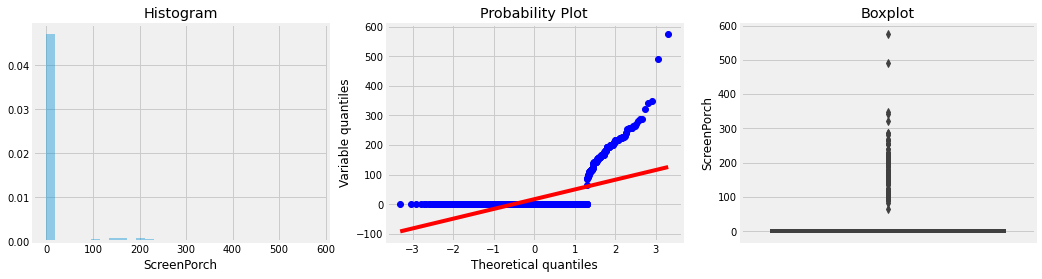

Train MiscVal


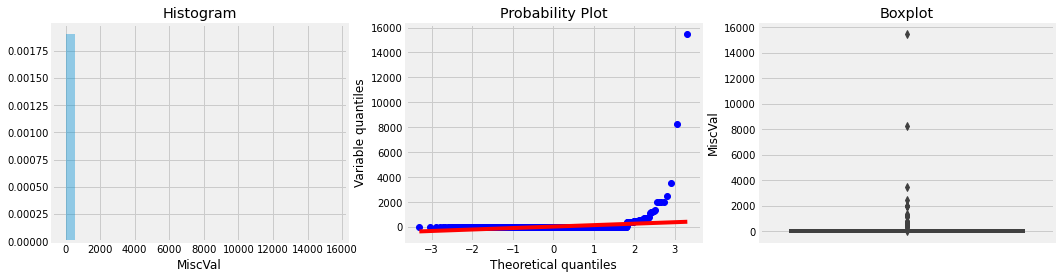

Test MiscVal


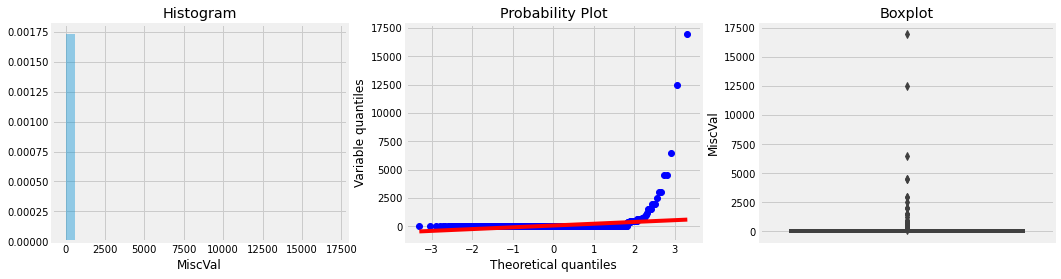

In [23]:
for var in cont_vars:
    print("Train", var)
    diagnostic_plots(train, var)
    print("Test", var)
    diagnostic_plots(test, var)

In [12]:
# defining outlier function to find outliers
def outlier_function(df, col_name):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(1.5*IQR)
    lower_limit = first_quartile-(1.5*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [13]:
# finding outliers in train and test data
# loop through all columns to see if there are any outliers

outlier_columns=[]
for dataset in data:
    
    for column in cont_vars:
        if outlier_function(dataset, column)[2] > 0:
            outlier_columns.append(column)
            print( "There are {} outliers in {}".format(outlier_function(dataset, column)[2], column))
            print("Lower limit is {} & Upper limit is {} in {}".format(outlier_function(dataset, column)[0],
                                                                       outlier_function(dataset, column)[1] ,column))
            print('\n')
    print(outlier_columns)

NameError: name 'cont_vars' is not defined

In [14]:
### Skewness  and kurtosis
print("Skewness: " , '\n', + train.skew().sort_values(ascending = False))
print("Kurtosis: " , '\n',+ train.kurt().sort_values(ascending = False))

Skewness:  
 MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
YrSold            0.096269
FullBath          0.036562
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
GarageYrBlt    

In [16]:
# Before we process further, lets save our original data 
train_orig = train.copy(deep=True)
test_orig = test.copy(deep=True)

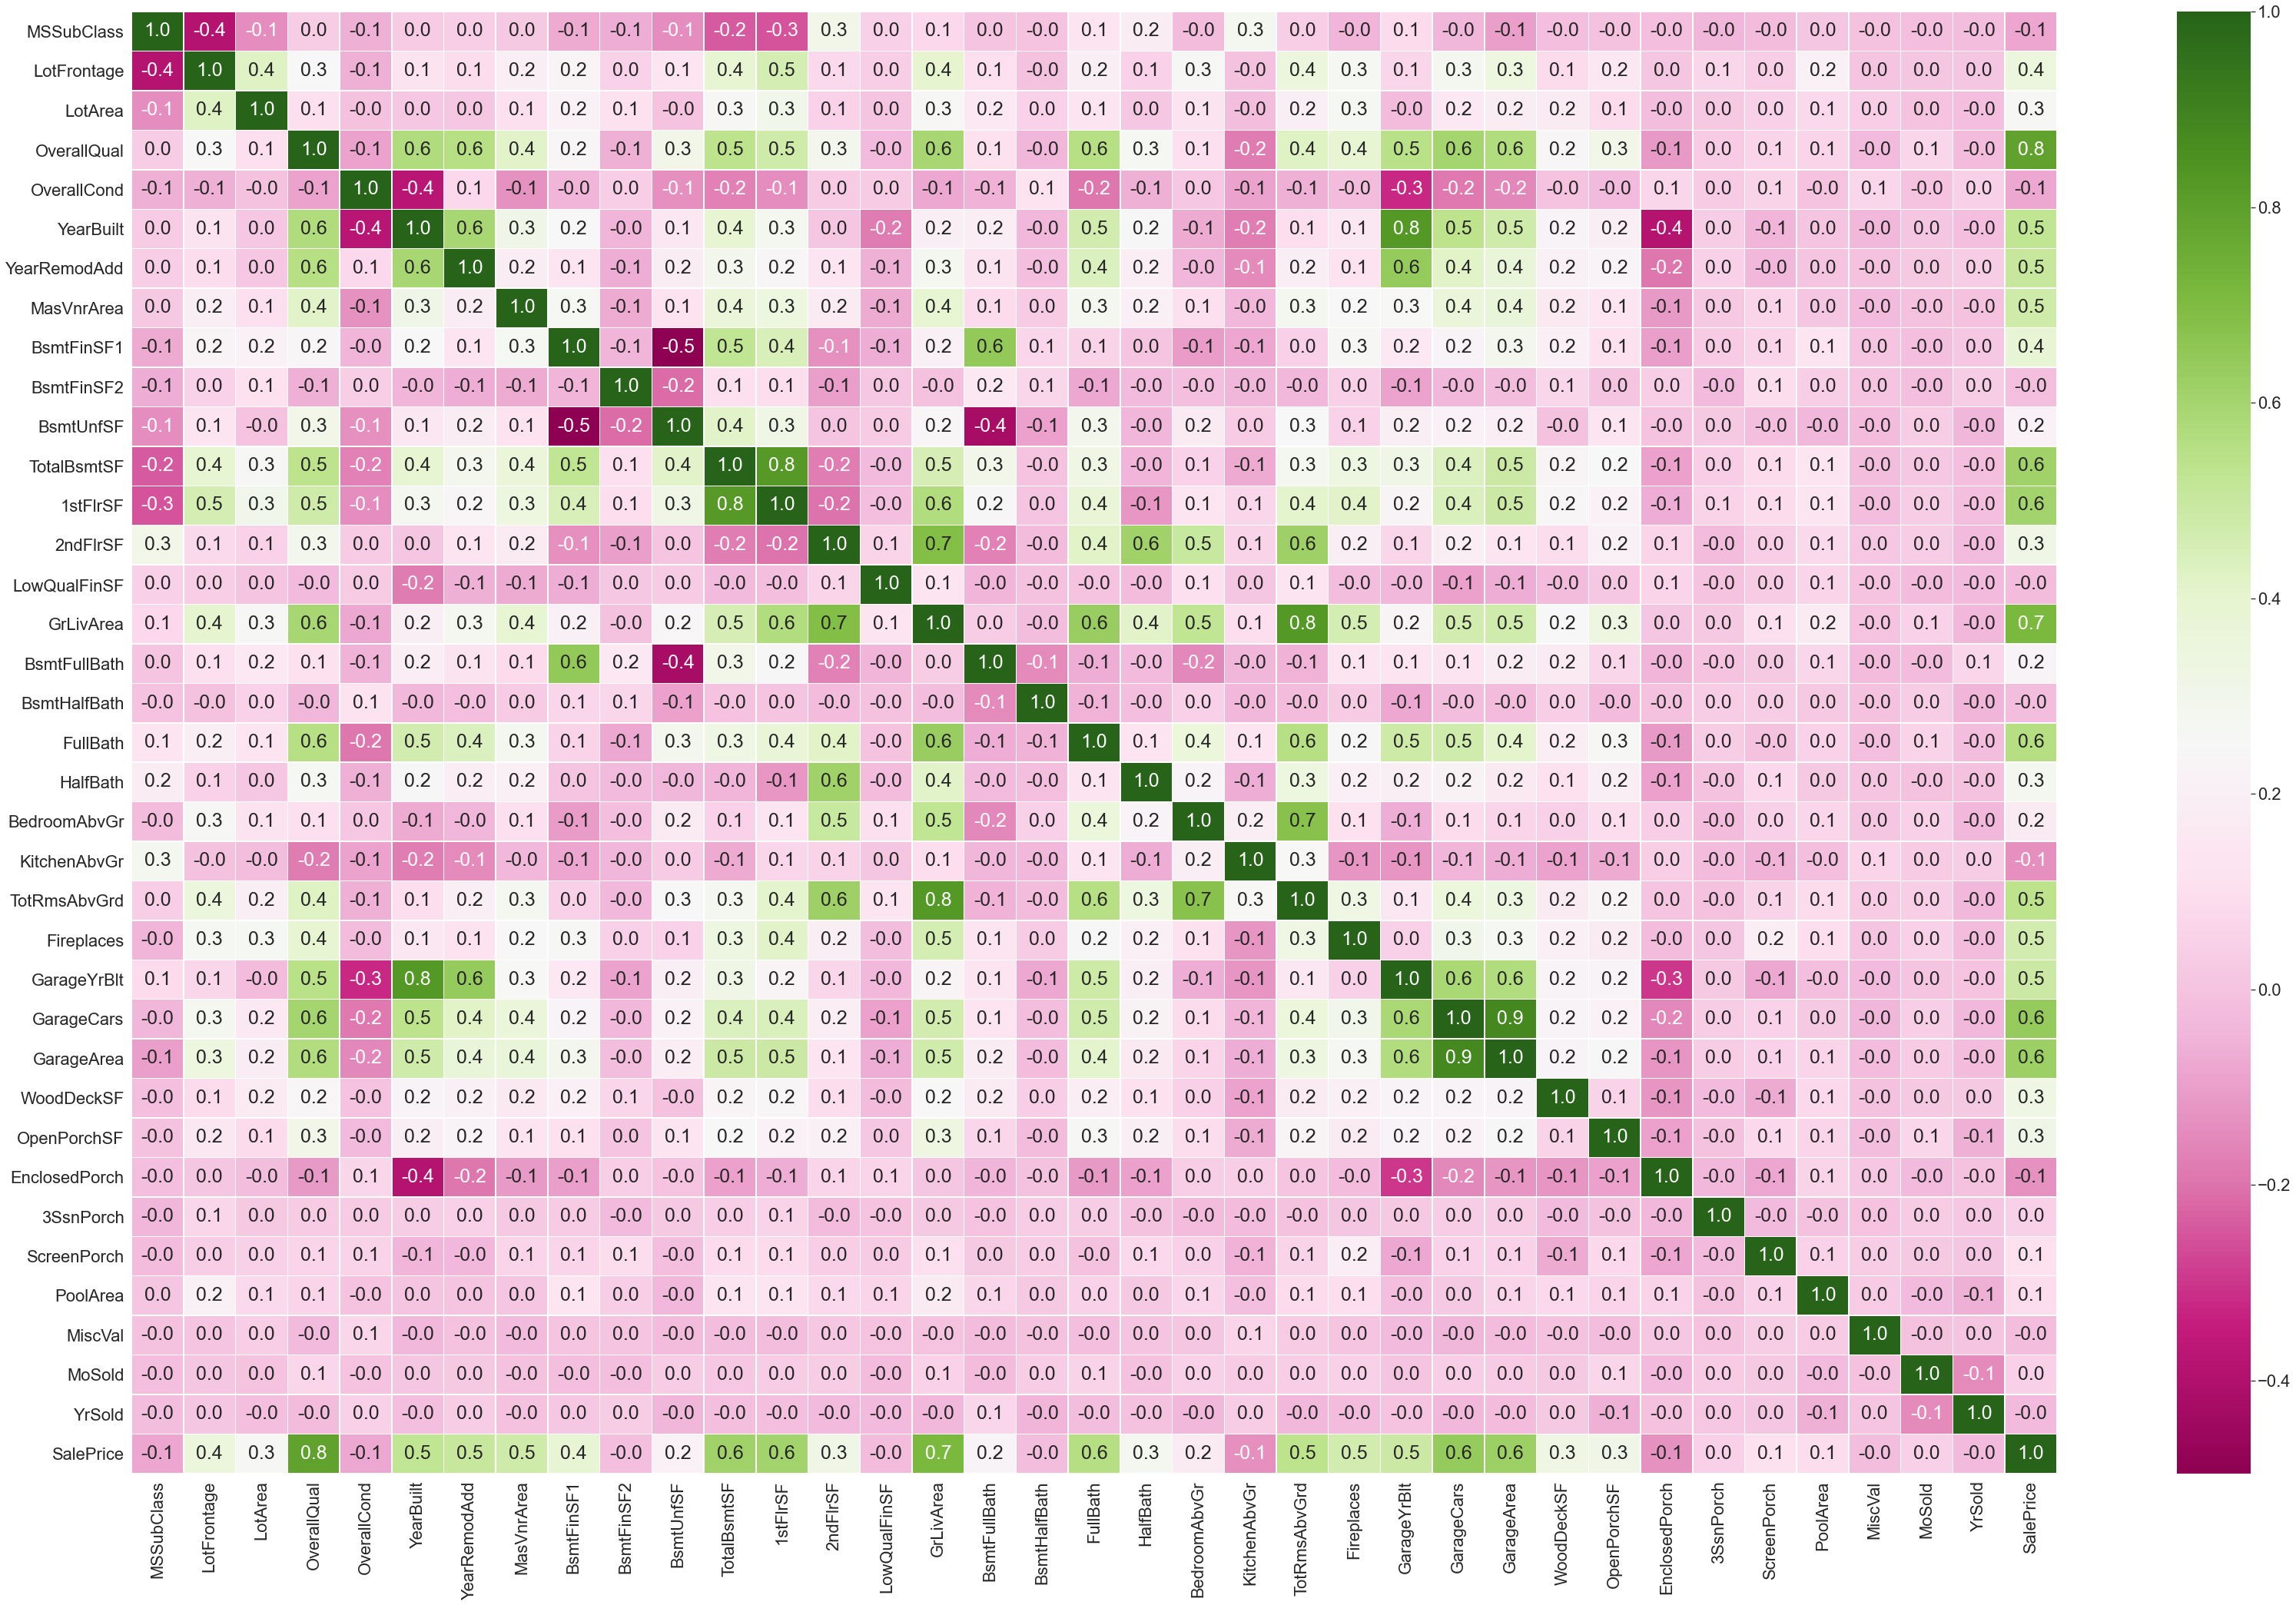

In [17]:
correlation_train=train.corr()
sb.set(font_scale=2)
plt.figure(figsize = (50,35))
ax = sb.heatmap(correlation_train, annot=True,annot_kws={"size": 25},fmt='.1f',cmap='PiYG', linewidths=.5)

In [18]:
correlation_train.columns, len(correlation_train.columns)

(Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
        'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
        'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 37)

In [19]:
corr_dict=correlation_train['SalePrice'].sort_values(ascending=False).to_dict()
important_columns=[]
for key,value in corr_dict.items():
    if ((value>0.1) & (value<0.8)) | (value<=-0.1):
        important_columns.append(key)
important_columns

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ScreenPorch',
 'EnclosedPorch',
 'KitchenAbvGr']

In [20]:
pd.set_option('display.max_rows', 5000)
train_test_null_info=pd.DataFrame(train_test.isnull().sum(),columns=['Count of NaN'])
train_test_dtype_info=pd.DataFrame(train_test.dtypes,columns=['DataTypes'])
train_tes_info=pd.concat([train_test_null_info,train_test_dtype_info],axis=1)
train_tes_info

Count of NaN DataTypes
MSSubClass                0     int64
MSZoning                  4    object
LotFrontage             486   float64
LotArea                   0     int64
Street                    0    object
Alley                  2721    object
LotShape                  0    object
LandContour               0    object
Utilities                 2    object
LotConfig                 0    object
LandSlope                 0    object
Neighborhood              0    object
Condition1                0    object
Condition2                0    object
BldgType                  0    object
HouseStyle                0    object
OverallQual               0     int64
OverallCond               0     int64
YearBuilt                 0     int64
YearRemodAdd              0     int64
RoofStyle                 0    object
RoofMatl                  0    object
Exterior1st               1    object
Exterior2nd               1    object
MasVnrType               24    object
MasVnrArea               23   float64
ExterQual                 0    object
ExterCond                 0    object
Foundation                0    object
BsmtQual                 81    object
BsmtCond                 82    object
BsmtExposure             82    object
BsmtFinType1             79    object
BsmtFinSF1                1   float64
BsmtFinType2             80    object
BsmtFinSF2                1   float64
BsmtUnfSF                 1   float64
TotalBsmtSF               1   float64
Heating                   0    object
HeatingQC                 0    object
CentralAir                0    object
Electrical                1    object
1stFlrSF                  0     int64
2ndFlrSF                  0     int64
LowQualFinSF              0     int64
GrLivArea                 0     int64
BsmtFullBath              2   float64
BsmtHalfBath              2   float64
FullBath                  0     int64
HalfBath                  0     int64
BedroomAbvGr              0     int64
KitchenAbvGr              0     int64
KitchenQual               1    object
TotRmsAbvGrd              0     int64
Functional                2    object
Fireplaces                0     int64
FireplaceQu            1420    object
GarageType              157    object
GarageYrBlt             159   float64
GarageFinish            159    object
GarageCars                1   float64
GarageArea                1   float64
GarageQual              159    object
GarageCond              159    object
PavedDrive                0    object
WoodDeckSF                0     int64
OpenPorchSF               0     int64
EnclosedPorch             0     int64
3SsnPorch                 0     int64
ScreenPorch               0     int64
PoolArea                  0     int64
PoolQC                 2909    object
Fence                  2348    object
MiscFeature            2814    object
MiscVal                   0     int64
MoSold                    0     int64
YrSold                    0     int64
SaleType                  1    object
SaleCondition             0    object
SalePrice              1459   float64

### I will deal with outliers,after filling missing values, categorical data encoding, continuous data transformation to make itn normalised, discretisation
### Steps are:-

1. Missing Data Imputation

2. Categorical Data Encoding.

3. Continuous Data Transformation to make it normalised.

4. Discretisation.

5. Outlier Handling.

6. Feature Selection.

### Lets visualise relationship of target label with continuous variables, discrete label and categorical labels, one by one

### Lets see distribution of Target Label first

In [33]:
## Getting the correlation of all the features with target variable.

(train.corr()**2)["SalePrice"].sort_values(ascending = False)[1:]

OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
GarageYrBlt      0.236548
MasVnrArea       0.228000
Fireplaces       0.218023
BsmtFinSF1       0.149320
LotFrontage      0.123763
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
MiscVal          0.000449
BsmtHalfBath     0.000284
BsmtFinSF2       0.000129
Name: SalePrice, dtype: float64

### Imputation and Outlier treatment

In [34]:
train_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [35]:
missing_percentage(train_test[cont_vars])

Total  Percent
LotFrontage    486    16.65
GarageYrBlt    159     5.45
MasVnrArea      23     0.79
TotalBsmtSF      1     0.03
GarageArea       1     0.03
BsmtFinSF1       1     0.03
BsmtFinSF2       1     0.03
BsmtUnfSF        1     0.03

In [21]:
#LotFrontage
train_test['LotFrontage'] = train_test['LotFrontage'].fillna(train_test.groupby('Neighborhood')['LotFrontage'].transform('mean'))
train_test['LotFrontage'].interpolate(method='linear',inplace=True)
train_test['LotFrontage']=train_test['LotFrontage'].astype(int)

In [22]:
# GarageYrBlt, This column must be blank for no Garages, so we leave it blank and fill it with 0

train_test['GarageYrBlt'].fillna(0, inplace = True)

#### As per data - MasVnrArea: Masonry veneer area in square feet. Masonry veneer walls consist of a single non-structural external layer of masonry, typically made of brick, stone or manufactured stone. Masonry veneer can have an air space behind it and is technically called "anchored veneer". A masonry veneer attached directly to the backing is called "adhered veneer".

In [23]:
# This might be zero for NaN values. Lets fill it with mean value as per MasVnrType
train_test['MasVnrArea'] = train_test['MasVnrArea'].fillna(train_test.groupby('MasVnrType')['MasVnrArea'].transform('mean'))
train_test['MasVnrArea'].interpolate(method='linear',inplace=True)
train_test['MasVnrArea']=train_test['MasVnrArea'].astype(int)

In [24]:
cols = ['GarageArea','TotalBsmtSF','BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF']
for col in cols:
    train_test[col].fillna(0,inplace = True)
    

### Filling missing values in discrete numerical variables

In [25]:
discrete_vars

NameError: name 'discrete_vars' is not defined

In [41]:
missing_percentage(train_test[discrete_vars])

Total  Percent
BsmtHalfBath      2     0.07
BsmtFullBath      2     0.07
GarageCars        1     0.03

In [26]:
# Seeing the properties of these variables, we can conclude that they can be fill with 0

cols = [ 'BsmtHalfBath','BsmtFullBath', 'GarageCars']
for col in cols:
    train_test[col].fillna(0, inplace = True)

### Filling missing values of categorical data

In [43]:
missing_percentage(train_test[cat_vars])

Total  Percent
PoolQC         2909    99.66
MiscFeature    2814    96.40
Alley          2721    93.22
Fence          2348    80.44
FireplaceQu    1420    48.65
GarageCond      159     5.45
GarageQual      159     5.45
GarageFinish    159     5.45
GarageType      157     5.38
BsmtCond         82     2.81
BsmtExposure     82     2.81
BsmtQual         81     2.77
BsmtFinType2     80     2.74
BsmtFinType1     79     2.71
MasVnrType       24     0.82
MSZoning          4     0.14
Functional        2     0.07
Utilities         2     0.07
Electrical        1     0.03
KitchenQual       1     0.03
SaleType          1     0.03
Exterior2nd       1     0.03
Exterior1st       1     0.03

In [27]:
# Lets fill them as per above insight
cols = ['PoolQC', 'MiscFeature','Alley' ,'Fence', 'GarageCond' , 'GarageQual', 
        'GarageFinish','GarageType','BsmtCond' ,'BsmtQual', 'BsmtExposure' , 'BsmtFinType2' , 
        'BsmtFinType1','MasVnrType', 'FireplaceQu']

for col in cols:
    train_test[col].fillna('None', inplace = True)

In [28]:
cols = ['Electrical', 'KitchenQual', 'Utilities', 'MSZoning', 'Functional', 'SaleType', 'Exterior1st',
       'Exterior2nd']
for col in cols :
    
    train_test[col].fillna(train_test[col].mode()[0], inplace = True) 

### Next step - Creating

#### Lets see, what new features we can create from exisitng features.
##### we can make a new column for total size of the house.
##### We can make a new column adding Year Built and Year Remodification.
##### Total bathrooms
##### Total porch

In [46]:
train_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [29]:
train_test['YrBltRmd']=train_test['YearBuilt']+train_test['YearRemodAdd']
train_test['Total_Square_Feet'] = (train_test['BsmtFinSF1'] + train_test['BsmtFinSF2'] + train_test['1stFlrSF'] + train_test['2ndFlrSF'] + train_test['TotalBsmtSF'])
train_test['Total_Bath'] = (train_test['FullBath'] + (0.5 * train_test['HalfBath']) + train_test['BsmtFullBath'] + (0.5 * train_test['BsmtHalfBath']))
train_test['Total_Porch_Area'] = (train_test['OpenPorchSF'] + train_test['3SsnPorch'] + train_test['EnclosedPorch'] + train_test['ScreenPorch'] + train_test['WoodDeckSF'])

In [30]:
train_test['House_Age1']=train_test['YrSold']-train_test['YearBuilt']+1
train_test['House_Age2']=train_test['YrSold']-train_test['YearRemodAdd']+2

In [49]:
#train['House_Age2']= train['House_Age2'] + 1
#train_test['House_Age2'].value_counts().sort_values(ascending = True)

0       1
1       2
26     10
24     13
28     14
27     14
23     15
22     17
20     18
29     18
25     18
30     20
21     21
56     21
47     22
37     22
52     23
57     23
48     25
31     26
50     26
43     26
40     27
51     27
45     27
49     28
35     29
54     29
42     30
55     30
36     30
39     30
53     31
19     33
44     33
46     34
34     36
38     37
17     37
18     38
32     39
62     42
16     46
41     47
33     50
15     57
14     58
13     62
12     66
11     69
9      75
60     76
61     78
59     79
8      83
10     85
7      91
5      97
4     104
6     111
58    112
3     193
2     238
Name: House_Age2, dtype: int64

In [50]:
#### We can make new columns for having pool, first floor, second floor, garage, basement ,fireplace and old house

In [31]:
train_test['exists_pool'] = train_test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train_test['exists_IstFl'] = train_test['1stFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train_test['exists_2ndFl'] = train_test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train_test['exists_garage'] = train_test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train_test['exists_fireplace'] = train_test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
train_test['exists_bsmt'] = train_test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train_test['old_house'] = train_test['YearBuilt'].apply(lambda x: 1 if x <1990 else 0)


### Converting

In [32]:
(train_test.dtypes).value_counts()

object     43
int64      38
float64    12
dtype: int64

#### We can see that out of total 47 numerical variables train has 43 int64 & 4 float64 types, whereas
#### test has 33 int64 and 13 float64
Lets correct this first

In [33]:
for i in train_test.columns:
    if 'SalePrice' not in i:
        if 'object' in str(train_test[str(i)].dtype):
            train_test[str(i)]=train_test[str(i)].fillna(method='ffill')

In [34]:
(train_test.dtypes).value_counts()

object     43
int64      38
float64    12
dtype: int64

In [35]:
### Categorical variables

cat_vars = [var for var in train_test.columns if train_test[var].dtypes=='O']
print('Number of categorical variables: ', cat_vars, len(cat_vars))

Number of categorical variables:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] 43


In [36]:
# Encoding usinf LabelEncoder
for col in cat_vars:
    lbl_enc = LabelEncoder() 
    lbl_enc.fit(list(train_test[col].values)) 
    train_test[col] = lbl_enc.transform(list(train_test[col].values))

In [37]:
(train_test.dtypes).value_counts()

int64      81
float64    12
dtype: int64

### Finding skewdness and corrcting it

In [42]:
numeric_features = train_test.dtypes[train_test.dtypes != "object"].index
skewed_features = train_test[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
print(skewed_features)

Utilities            54.000003
MiscVal              21.947195
PoolArea             16.898328
exists_pool          14.884318
LotArea              12.822431
LowQualFinSF         12.088761
Heating              12.078788
Condition2           12.060093
3SsnPorch            11.376065
RoofMatl              8.707767
MiscFeature           5.064321
LandSlope             4.975157
KitchenAbvGr          4.302254
BsmtFinSF2            4.146143
EnclosedPorch         4.003891
ScreenPorch           3.946694
BsmtHalfBath          3.931594
Condition1            2.983114
MasVnrArea            2.600375
OpenPorchSF           2.535114
BldgType              2.192261
Total_Square_Feet     1.972651
WoodDeckSF            1.842433
RoofStyle             1.553307
1stFlrSF              1.469604
LotFrontage           1.468441
BsmtFinSF1            1.425230
Total_Porch_Area      1.376649
MSSubClass            1.375457
GrLivArea             1.269358
TotalBsmtSF           1.156894
BsmtUnfSF             0.919339
2ndFlrSF

In [43]:
high_skewness = skewed_features[abs(skewed_features) > 0.9]
skewed_features = high_skewness.index

In [44]:
print(high_skewness)
print('\nVariables with high skewness: \n\n',skewed_features)

Utilities            54.000003
MiscVal              21.947195
PoolArea             16.898328
exists_pool          14.884318
LotArea              12.822431
LowQualFinSF         12.088761
Heating              12.078788
Condition2           12.060093
3SsnPorch            11.376065
RoofMatl              8.707767
MiscFeature           5.064321
LandSlope             4.975157
KitchenAbvGr          4.302254
BsmtFinSF2            4.146143
EnclosedPorch         4.003891
ScreenPorch           3.946694
BsmtHalfBath          3.931594
Condition1            2.983114
MasVnrArea            2.600375
OpenPorchSF           2.535114
BldgType              2.192261
Total_Square_Feet     1.972651
WoodDeckSF            1.842433
RoofStyle             1.553307
1stFlrSF              1.469604
LotFrontage           1.468441
BsmtFinSF1            1.425230
Total_Porch_Area      1.376649
MSSubClass            1.375457
GrLivArea             1.269358
TotalBsmtSF           1.156894
BsmtUnfSF             0.919339
BsmtExpo

In [45]:
train_test[skewed_features].head()

Utilities  MiscVal  PoolArea  exists_pool  LotArea  LowQualFinSF  Heating  \
0          0        0         0            0     8450             0        1   
1          0        0         0            0     9600             0        1   
2          0        0         0            0    11250             0        1   
3          0        0         0            0     9550             0        1   
4          0        0         0            0    14260             0        1   

   Condition2  3SsnPorch  RoofMatl  MiscFeature  LandSlope  KitchenAbvGr  \
0           2          0         1            1          0             1   
1           2          0         1            1          0             1   
2           2          0         1            1          0             1   
3           2          0         1            1          0             1   
4           2          0         1            1          0             1   

   BsmtFinSF2  EnclosedPorch  ScreenPorch  BsmtHalfBath  Condition1  \
0         0.0              0            0           0.0           2   
1         0.0              0            0           1.0           1   
2         0.0              0            0           0.0           2   
3         0.0            272            0           0.0           2   
4         0.0              0            0           0.0           2   

   MasVnrArea  OpenPorchSF  BldgType  Total_Square_Feet  WoodDeckSF  \
0         196           61         0             3272.0           0   
1           0            0         0             3502.0         298   
2         162           42         0             3192.0           0   
3           0           35         0             2689.0           0   
4         350           84         0             3998.0         192   

   RoofStyle  1stFlrSF  LotFrontage  BsmtFinSF1  Total_Porch_Area  MSSubClass  \
0          1       856           65       706.0                61          60   
1          1      1262           80       978.0               298          20   
2          1       920           68       486.0                42          60   
3          1       961           60       216.0               307          70   
4          1      1145           84       655.0               276          60   

   GrLivArea  TotalBsmtSF  BsmtUnfSF  BsmtExposure  LotConfig  KitchenQual  \
0       1710        856.0      150.0             3          4            2   
1       1262       1262.0      284.0             1          2            3   
2       1786        920.0      434.0             2          4            2   
3       1717        756.0      540.0             3          0            2   
4       2198       1145.0      490.0             0          2            2   

   MSZoning  ExterQual  Fence  ExterCond  SaleCondition  BsmtCond  PavedDrive  \
0         3          2      4          4              4         4           2   
1         3          3      4          4              4         4           2   
2         3          2      4          4              4         4           2   
3         3          3      4          4              0         1           2   
4         3          2      4          4              4         4           2   

   BsmtFinType2  GarageQual  Electrical  LandContour  CentralAir  GarageCond  \
0             6           5           4            3           1           5   
1             6           5           4            3           1           5   
2             6           5           4            3           1           5   
3             6           5           4            3           1           5   
4             6           5           4            3           1           5   

   SaleType  GarageYrBlt  exists_garage  Functional  exists_bsmt  Street  \
0         8       2003.0              1           6            1       1   
1         8       1976.0              1           6            1       1   
2         8       2001.0              1           6        

In [46]:
# Using boxcox for correcting skedness
for feature in skewed_features:
    train_test[feature] = boxcox1p(train_test[feature], boxcox_normmax(train_test[feature] + 1))

In [47]:
train_test[skewed_features].head()

Utilities  MiscVal  PoolArea  exists_pool    LotArea  LowQualFinSF  \
0        0.0      0.0       0.0          0.0  13.424521           0.0   
1        0.0      0.0       0.0          0.0  13.694528           0.0   
2        0.0      0.0       0.0          0.0  14.034134           0.0   
3        0.0      0.0       0.0          0.0  13.683422           0.0   
4        0.0      0.0       0.0          0.0  14.550143           0.0   

    Heating  Condition2  3SsnPorch  RoofMatl  MiscFeature  LandSlope  \
0  0.520289    1.255038        0.0  0.516626     0.599329        0.0   
1  0.520289    1.255038        0.0  0.516626     0.599329        0.0   
2  0.520289    1.255038        0.0  0.516626     0.599329        0.0   
3  0.520289    1.255038        0.0  0.516626     0.599329        0.0   
4  0.520289    1.255038        0.0  0.516626     0.599329        0.0   

   KitchenAbvGr  BsmtFinSF2  EnclosedPorch  ScreenPorch  BsmtHalfBath  \
0       0.75096         0.0       0.000000          0.0       0.00000   
1       0.75096         0.0       0.000000          0.0       0.71081   
2       0.75096         0.0       0.000000          0.0       0.00000   
3       0.75096         0.0      16.012022          0.0       0.00000   
4       0.75096         0.0       0.000000          0.0       0.00000   

   Condition1  MasVnrArea  OpenPorchSF  BldgType  Total_Square_Feet  \
0    1.242948   19.509965    12.009559       0.0          21.773910   
1    0.748863    0.000000     0.000000       0.0          22.161556   
2    1.242948   17.835995     9.849185       0.0          21.634056   
3    1.242948    0.000000     8.921747       0.0          20.685366   
4    1.242948   25.518155    14.180239       0.0          22.933857   

   WoodDeckSF  RoofStyle  1stFlrSF  LotFrontage  BsmtFinSF1  Total_Porch_Area  \
0    0.000000   0.603899  5.318379    14.991428  117.855863         18.721470   
1   56.339211   0.603899  5.550627    16.886058  146.805798         51.575372   
2    0.000000   0.603899  5.362015    15.385756   91.575284         14.644414   
3    0.000000   0.603899  5.388291    14.314502   52.776367         52.547851   
4   42.351294   0.603899  5.493031    17.361996  112.040325         49.148918   

   MSSubClass  GrLivArea  TotalBsmtSF  BsmtUnfSF  BsmtExposure  LotConfig  \
0    6.502440   7.234116   296.832332  30.016554     15.085192   3.816988   
1    4.250991   6.947212   407.302419  44.178887      2.025826   1.940853   
2    6.502440   7.275132   314.805061  56.957794      6.760372   3.816988   
3    6.865584   7.237970   268.234291  64.881734     15.085192   0.000000   
4    6.502440   7.470741   376.259367  61.233857      0.000000   1.940853   

   KitchenQual   MSZoning  ExterQual     Fence  ExterCond  SaleCondition  \
0     5.077704  12.038913   5.498765  6.897404   5.100237      95.385755   
1    10.302990  12.038913  11.456357  6.897404   5.100237      95.385755   
2     5.077704  12.038913   5.498765  6.897404   5.100237      95.385755   
3     5.077704  12.038913  11.456357  6.897404   5.100237       0.000000   
4     5.077704  12.038913   5.498765  6.897404   5.100237      95.385755   

   BsmtCond  PavedDrive  BsmtFinType2  GarageQual  Electrical  LandContour  \
0  7.750873   10.465805    2476.08448   45.177318    6.260105    16.304702   
1  7.750873   10.465805    2476.08448   45.177318    6.260105    16.304702   
2  7.750873   10.465805    2476.08448   45.177318    6.260105    16.304702   
3  1.279875   10.465805    2476.08448   45.177318    6.260105    16.304702   
4  7.750873   10.465805    2476.08448   45.177318    6.260105    16.304702   

   CentralAir  GarageCond   SaleType   GarageYrBlt  exists_garage  Functional  \
0    10.49998   65.027911  3738.9334  8.440377e+56       0.712447   30.831045   
1    10.49998   65.027911  3738.9334  6.646213e+56       0.712447   30.831045   
2    10.49998   65.027911  3738.9334  8.293197e+56       0.712447   30.831045   
3    10.49998   65.027911  3738.9334  8.076958e+56       0.712447

In [48]:
train_test=pd.get_dummies(train_test,dtype='int8')

In [49]:
train_test.shape

(2919, 93)

In [50]:
train=train_test[0:1460]
test=train_test[1460:2919]

In [51]:
len(train), len(test)

(1460, 1459)

In [52]:
train.interpolate(method='linear',inplace=True)
test.interpolate(method='linear',inplace=True)

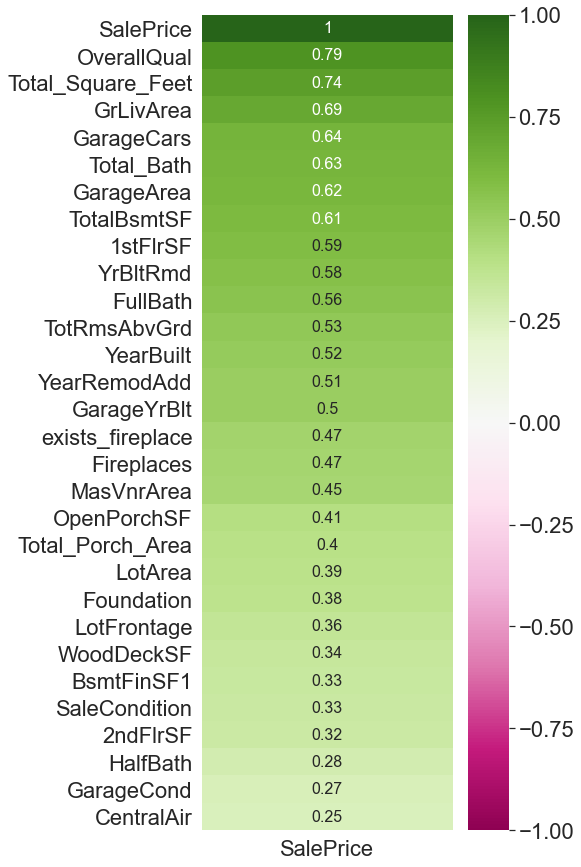

In [53]:
corr_new_train=train.corr()
plt.figure(figsize=(5,15))
sb.heatmap(corr_new_train[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(30),annot_kws={"size": 16},vmin=-1, cmap='PiYG', annot=True)
sb.set(font_scale=2)

In [54]:
corr_dict2=corr_new_train['SalePrice'].sort_values(ascending=False).to_dict()
corr_dict2

{'SalePrice': 1.0,
 'OverallQual': 0.7909816005838047,
 'Total_Square_Feet': 0.7411792606604959,
 'GrLivArea': 0.6948427966776257,
 'GarageCars': 0.640409197258349,
 'Total_Bath': 0.6317310679319897,
 'GarageArea': 0.6234314389183598,
 'TotalBsmtSF': 0.607664314018927,
 '1stFlrSF': 0.5885261486489618,
 'YrBltRmd': 0.5761444313502854,
 'FullBath': 0.5606637627484452,
 'TotRmsAbvGrd': 0.5337231555820238,
 'YearBuilt': 0.5228973328794967,
 'YearRemodAdd': 0.5071009671113867,
 'GarageYrBlt': 0.501236469130411,
 'exists_fireplace': 0.4719080685164922,
 'Fireplaces': 0.4669288367515242,
 'MasVnrArea': 0.45493079487718546,
 'OpenPorchSF': 0.4065358661367877,
 'Total_Porch_Area': 0.39516894228388827,
 'LotArea': 0.3906209686440101,
 'Foundation': 0.38247899119010337,
 'LotFrontage': 0.3551574982658317,
 'WoodDeckSF': 0.3376558482078433,
 'BsmtFinSF1': 0.3349735372481382,
 'SaleCondition': 0.3260956409621053,
 '2ndFlrSF': 0.31933380283206614,
 'HalfBath': 0.2841076755947784,
 'GarageCond': 0.26

#### Columns with more than 30% positive or negative correlations with SalePrice

In [55]:
best_columns=[]
for key,value in corr_dict2.items():
    if ((value>=0.30) & (value<0.9)) | (value<=-0.30):
        best_columns.append(key)
best_columns

['OverallQual',
 'Total_Square_Feet',
 'GrLivArea',
 'GarageCars',
 'Total_Bath',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'YrBltRmd',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'exists_fireplace',
 'Fireplaces',
 'MasVnrArea',
 'OpenPorchSF',
 'Total_Porch_Area',
 'LotArea',
 'Foundation',
 'LotFrontage',
 'WoodDeckSF',
 'BsmtFinSF1',
 'SaleCondition',
 '2ndFlrSF',
 'BsmtExposure',
 'HeatingQC',
 'GarageType',
 'GarageFinish',
 'House_Age2',
 'House_Age1',
 'old_house',
 'KitchenQual',
 'BsmtQual',
 'ExterQual']

In [56]:
print(len(best_columns))

36


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36]),
 <a list of 36 Text major ticklabel objects>)

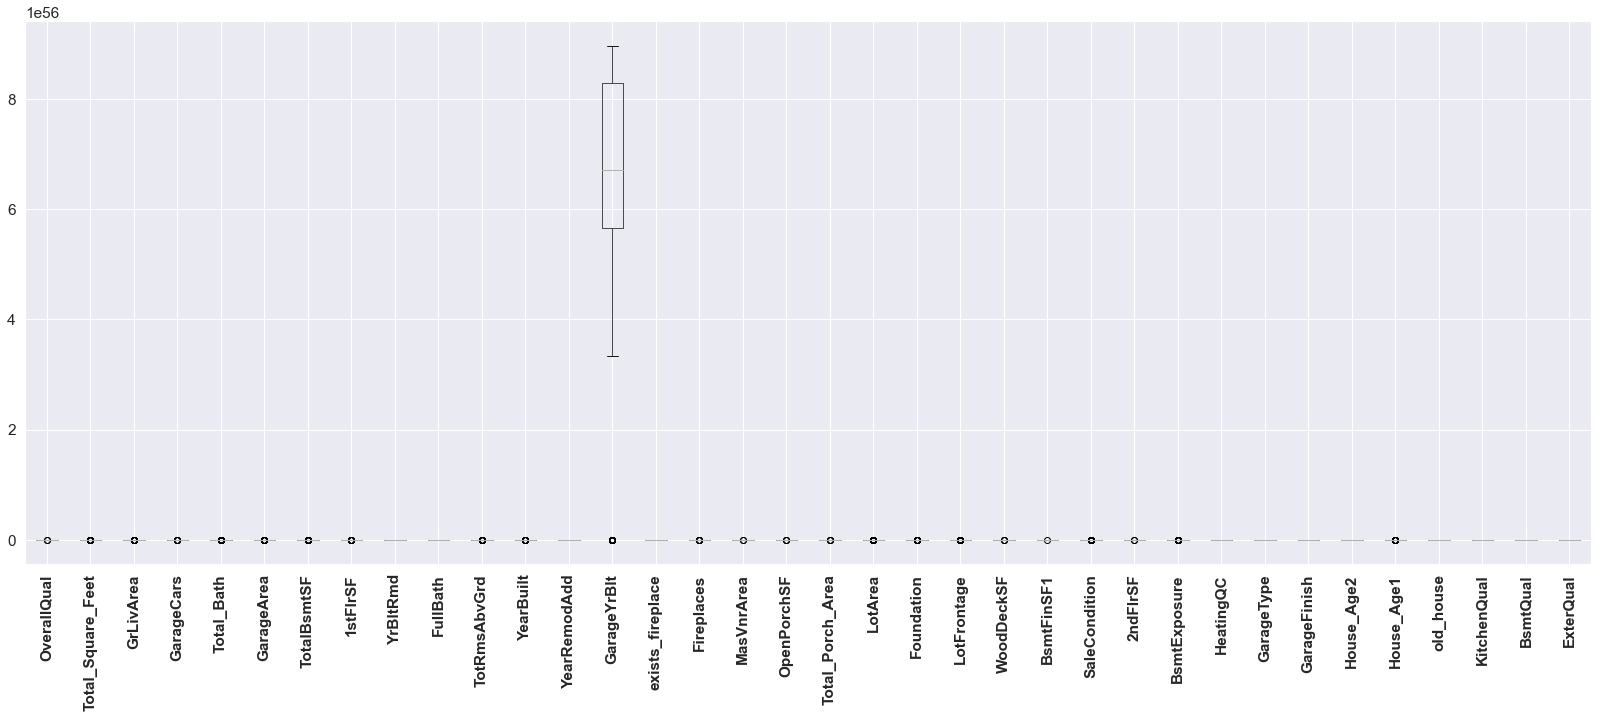

In [57]:
plt.figure(figsize=(25,10))
sb.set(font_scale=1.4)
train.boxplot(column=best_columns)
plt.xticks(weight='bold',rotation=90)

In [58]:
train['SalePrice_Log1p'] = np.log1p(train.SalePrice)

In [59]:
train.head()

MSSubClass   MSZoning  LotFrontage    LotArea     Street  Alley  LotShape  \
0    6.502440  12.038913    14.991428  13.424521  11.459793      1         3   
1    4.250991  12.038913    16.886058  13.694528  11.459793      1         3   
2    6.502440  12.038913    15.385756  14.034134  11.459793      1         0   
3    6.865584  12.038913    14.314502  13.683422  11.459793      1         0   
4    6.502440  12.038913    17.361996  14.550143  11.459793      1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0    16.304702        0.0   3.816988        0.0             5    1.242948   
1    16.304702        0.0   1.940853        0.0            24    0.748863   
2    16.304702        0.0   3.816988        0.0             5    1.242948   
3    16.304702        0.0   0.000000        0.0             6    1.242948   
4    16.304702        0.0   1.940853        0.0            15    1.242948   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0    1.255038       0.0           5            7            5       2003   
1    1.255038       0.0           2            6            8       1976   
2    1.255038       0.0           5            7            5       2001   
3    1.255038       0.0           5            7            5       1915   
4    1.255038       0.0           5            8            5       2000   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2003   0.603899  0.516626           12           13           1   
1          1976   0.603899  0.516626            8            8           2   
2          2002   0.603899  0.516626           12           13           1   
3          1970   0.603899  0.516626           13           15           2   
4          2000   0.603899  0.516626           12           13           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0   19.509965   5.498765   5.100237           2         2  7.750873   
1    0.000000  11.456357   5.100237           1         2  7.750873   
2   17.835995   5.498765   5.100237           2         2  7.750873   
3    0.000000  11.456357   5.100237           0         4  1.279875   
4   25.518155   5.498765   5.100237           2         2  7.750873   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0     15.085192             2  117.855863    2476.08448         0.0   
1      2.025826             0  146.805798    2476.08448         0.0   
2      6.760372             2   91.575284    2476.08448         0.0   
3     15.085192             0   52.776367    2476.08448         0.0   
4      0.000000             2  112.040325    2476.08448         0.0   

   BsmtUnfSF  TotalBsmtSF   Heating  HeatingQC  CentralAir  Electrical  \
0  30.016554   296.832332  0.520289          0    10.49998    6.260105   
1  44.178887   407.302419  0.520289          0    10.49998    6.260105   
2  56.957794   314.805061  0.520289          0    10.49998    6.260105   
3  64.881734   268.234291  0.520289          2    10.49998    6.260105   
4  61.233857   376.259367  0.520289          0    10.49998    6.260105   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  5.318379       854           0.0   7.234116           1.0       0.00000   
1  5.550627         0           0.0   6.947212           0.0       0.71081   
2  5.362015       866           0.0   7.275132           1.0       0.00000   
3  5.388291       756           0.0   7.237970           1.0       0.00000   
4  5.493031      1053           0.0   7.470741           1.0       0.00000   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3       0.75096     5.077704             8   
1         2         0             3       0.75096    10.302990             6   
2         2         1             3       0.75096     5.077704             6   
3         1         0             3       0.7

In [60]:
print(min(train['SalePrice_Log1p']))
print(max(train['SalePrice_Log1p']))

10.460270761075149
13.534474352733596


Skew Dist: 1.8828757597682129
Kurtosis Dist: 6.536281860064529


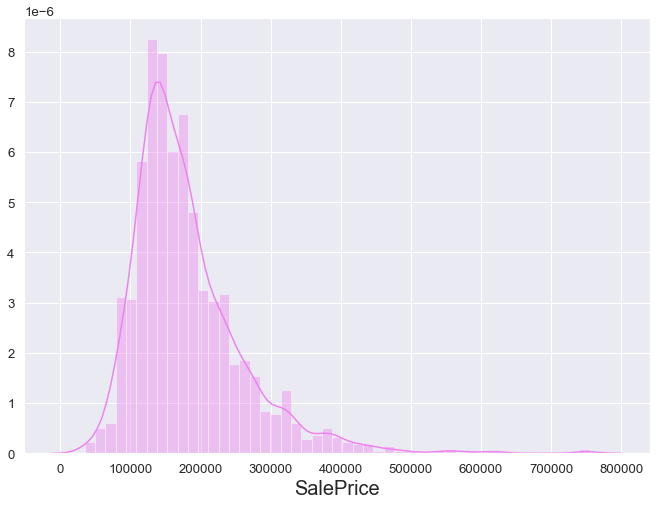

In [61]:
plt.figure(figsize=(10,8))
sb.set(font_scale=1.2)
sb.distplot(train['SalePrice'],color='violet')
plt.xlabel('SalePrice',fontsize=20)
print('Skew Dist:',train['SalePrice'].skew())
print('Kurtosis Dist:',train['SalePrice'].kurt())

Skew Dist: 0.12134661989685329
Kurtosis Dist: 0.809519155707878


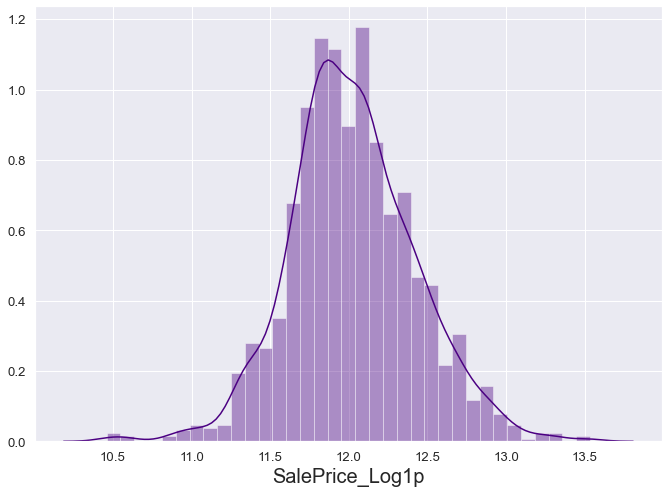

In [62]:
plt.figure(figsize=(10,8))
sb.set(font_scale=1.2)
sb.distplot(train['SalePrice_Log1p'],color='indigo')
plt.xlabel('SalePrice_Log1p',fontsize=20)
print('Skew Dist:',train['SalePrice_Log1p'].skew())
print('Kurtosis Dist:',train['SalePrice_Log1p'].kurt())

#### With the help of the  visualizations, we detected outliers. Let's get rid!

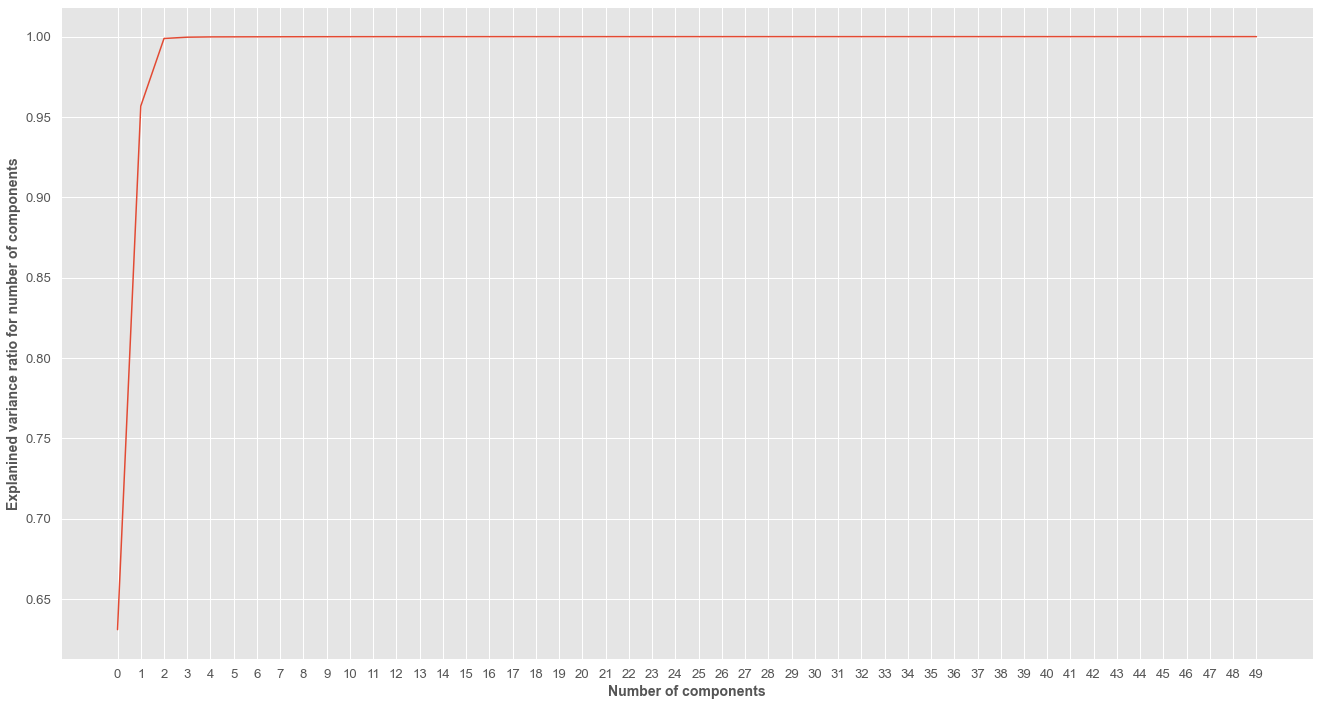

In [63]:
plt.style.use('ggplot')
plt.figure(figsize=(20,12))
rbst_scaler=RobustScaler()
train_rbst=rbst_scaler.fit_transform(train)

pca=PCA(50).fit(train_rbst)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xticks(np.arange(0, 50, 1))
plt.xlabel('Number of components',fontweight='bold',size=14)
plt.ylabel('Explanined variance ratio for number of components',fontweight='bold',size=14)

train_pca=PCA(3).fit_transform(train_rbst)

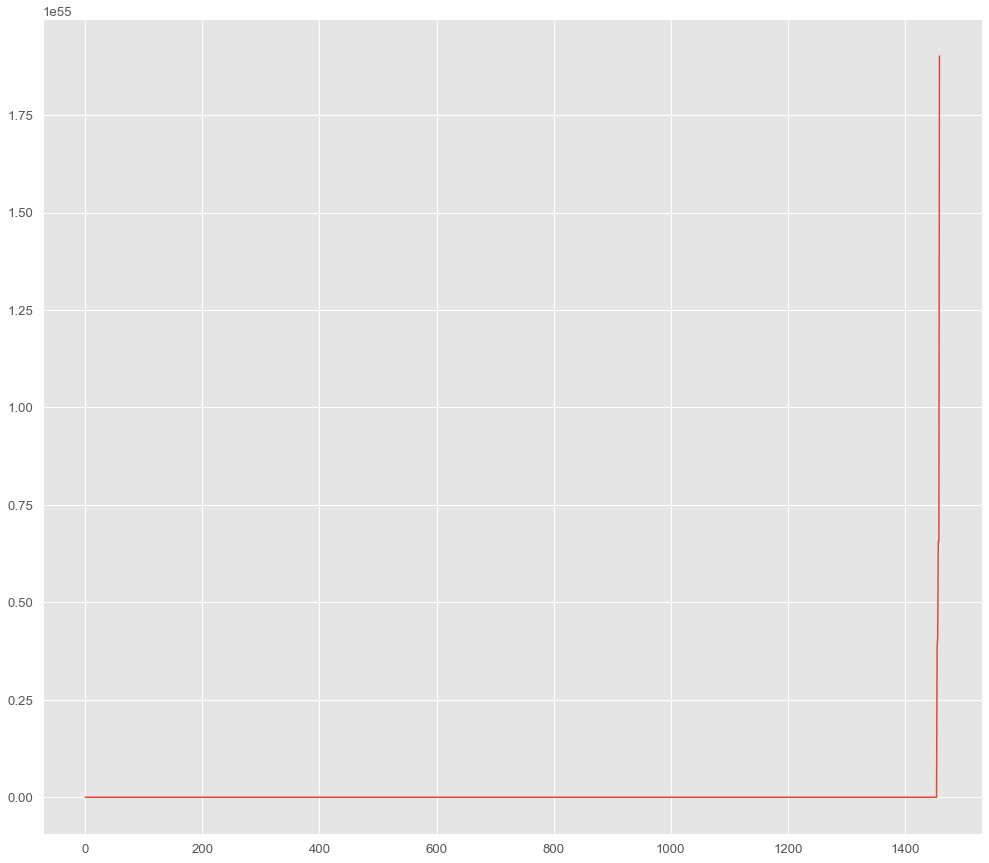

In [64]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(train)
distances, indices = nbrs.kneighbors(train)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,15))
plt.plot(distances)

In [65]:
dbscan = DBSCAN(eps=1400, min_samples=20).fit(train_pca)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels=dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

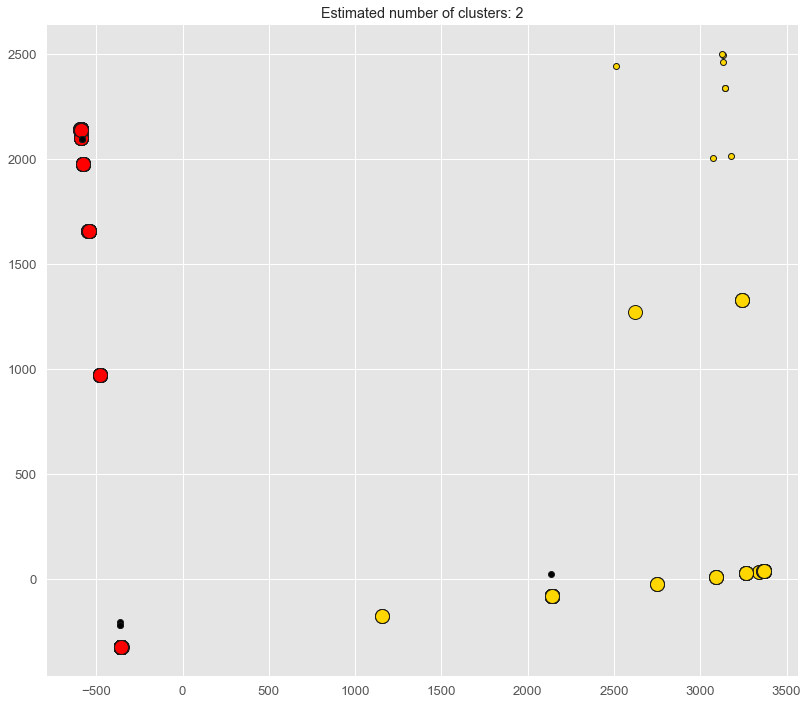

In [66]:
unique_labels = set(labels)
plt.figure(figsize=(12,12))
colors = [plt.cm.prism(each)  for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    
    xy = train_pca[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = train_pca[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [67]:
labels=pd.DataFrame(labels,columns=['Classes'])
print(labels[labels['Classes']< 0])

      Classes
197        -1
810        -1
1170       -1
1182       -1
1298       -1
1386       -1
1423       -1


In [68]:
train=pd.concat([train,labels],axis=1)

In [69]:
train[train.Classes==-1]

MSSubClass   MSZoning  LotFrontage    LotArea     Street  Alley  \
197     7.032144  12.038913    26.118117  15.851262  11.459793      1   
810     4.250991  12.038913    16.643843  13.811204  11.459793      1   
1170    7.190243  12.038913    16.398656  13.755757  11.459793      1   
1182    6.502440  12.038913    24.931945  14.751523  11.459793      1   
1298    6.502440  12.038913    36.043299  18.058232  11.459793      1   
1386    6.502440  12.038913    16.886058  14.898480  11.459793      1   
1423    7.190243  12.038913    15.123813  15.268762  11.459793      1   

      LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
197          3    16.304702        0.0   0.000000        0.0            12   
810          3    16.304702        0.0   3.816988        0.0            14   
1170         3    16.304702        0.0   3.816988        0.0            11   
1182         0    16.304702        0.0   0.000000        0.0            15   
1298         2     0.000000        0.0   0.000000        0.0             7   
1386         0    16.304702        0.0   3.816988        0.0            14   
1423         0    16.304702        0.0   0.982243        0.0             7   

      Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
197     0.000000    1.255038       0.0           5            8            4   
810     1.242948    1.255038       0.0           2            6            6   
1170    1.242948    1.255038       0.0           7            6            6   
1182    1.242948    1.255038       0.0           5           10            5   
1298    0.748863    1.255038       0.0           5           10            5   
1386    2.429517    1.255038       0.0           5            7            5   
1423    1.242948    1.255038       0.0           7            6            7   

      YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
197        1918          1990   0.603899  0.516626           11           12   
810        1974          1999   1.059263  0.516626            6            6   
1170       1977          1977   0.603899  0.516626            9           10   
1182       1996          1996   1.059263  0.516626           13            7   
1298       2008          2008   1.059263  0.000000           11           12   
1386       1978          1978   0.603899  0.516626            9           10   
1423       1966          1966   0.000000  0.893079            9           10   

      MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
197            2    0.000000   5.498765   2.335064           2         4   
810            1   14.086205  11.456357   5.100237           1         4   
1170           2    0.000000  11.456357   5.100237           1         4   
1182           2    0.000000   5.498765   5.100237           2         0   
1298           3   36.986262   0.000000   5.100237           2         0   
1386           1   18.939831  11.456357   5.100237           1         2   
1423           2    0.000000   5.498765   2.335064           1         2   

      BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
197   7.750873     15.085192             2  152.611467    166.225727   
810   7.750873     15.085192             0  112.962258    166.225727   
1170  7.750873      0.000000             0   96.110964   2476.084480   
1182  7.750873      0.000000             2  245.030955   2476.084480   
1298  7.750873      2.025826             2  475.812636   2476.084480   
1386  7.750873     15.085192             1  127.139205    166.225727   
1423  7.750873      0.000000             6    0.000000   2476.084480   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   Heating  HeatingQC  CentralAir  \
197     8.328699  28.778205   432.890903  0.520289          2    10.49998   
810    10.142658   0.000000   347.891887  0.520289          1    10.49998   
1170    0.000000  67.281910   363.084560  0.520289          4    10.49998   
1182    0.000000  45

In [70]:
# As these are the outliers, lets drop them
train.drop([197,810,1170,1182,1298,1386,1423],axis=0,inplace=True)

In [71]:
train.shape, test.shape

((1453, 95), (1459, 93))

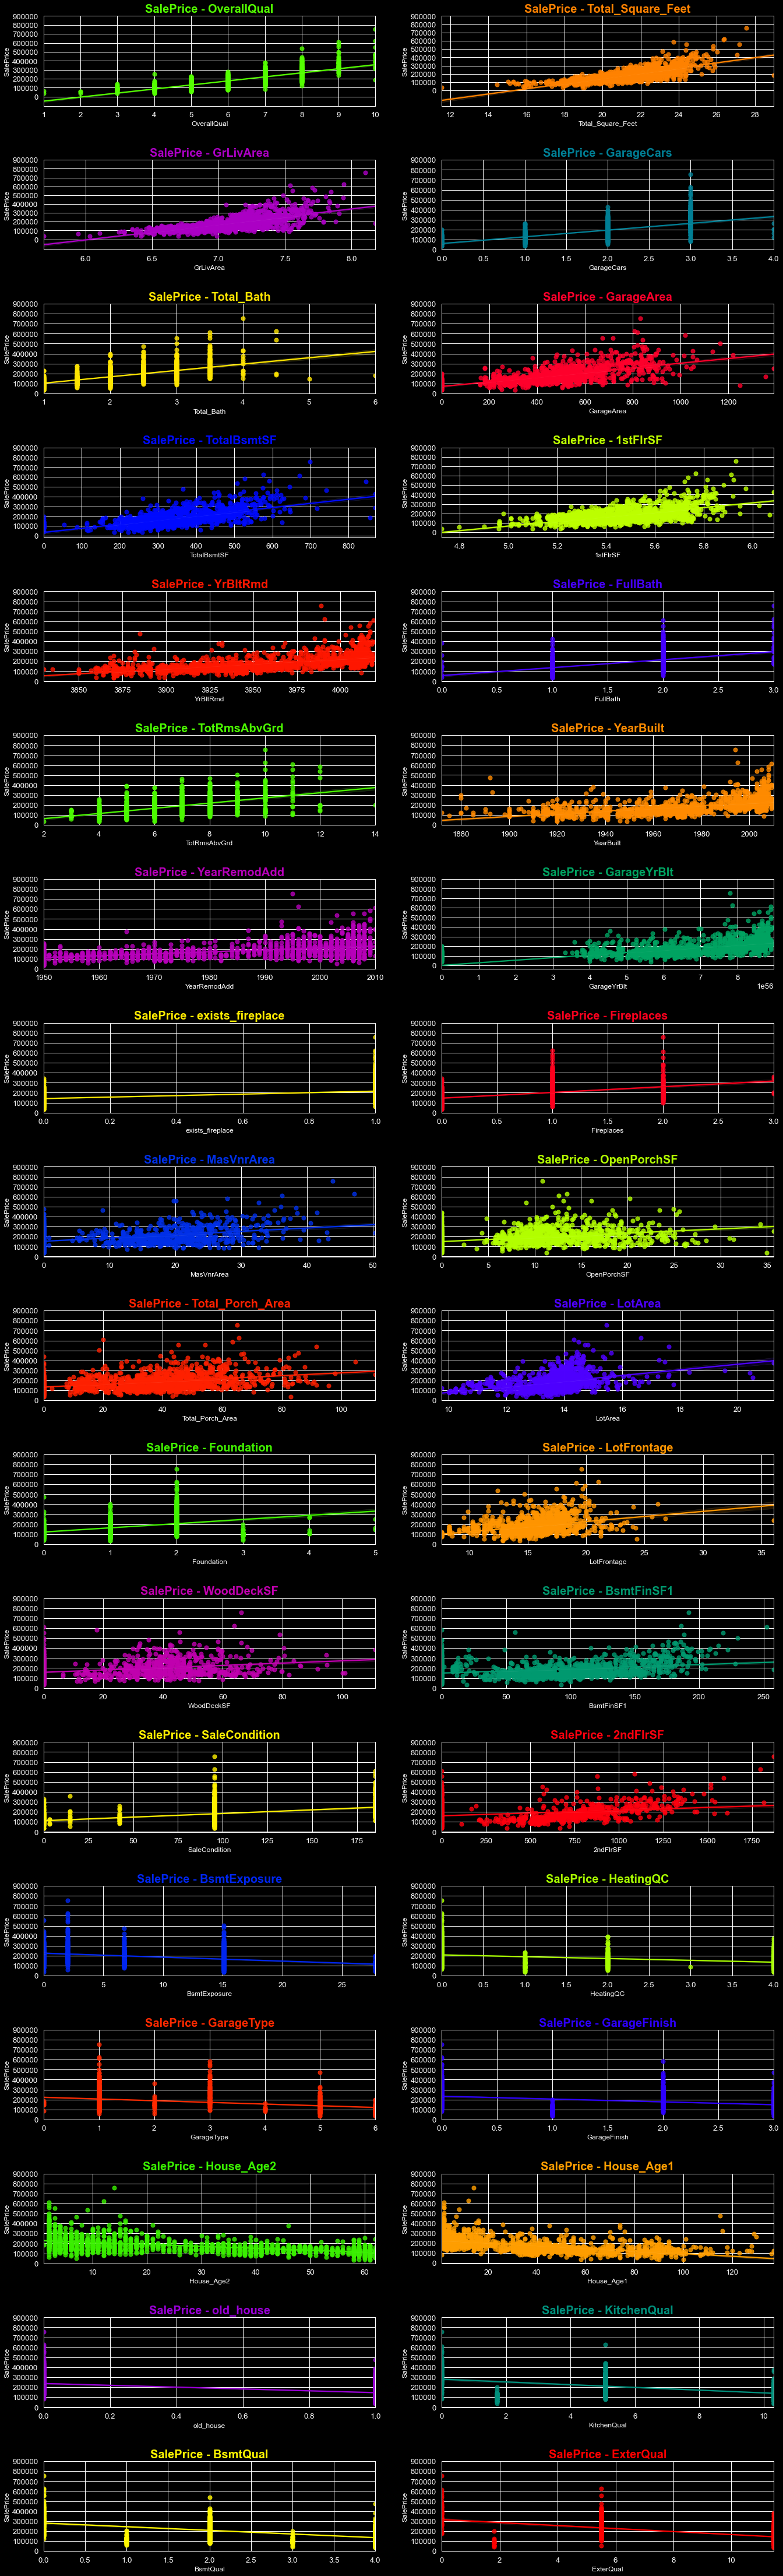

In [72]:
plt.style.use('dark_background')
fig, axes = plt.subplots(18, 2,figsize=(20,80))
fig.subplots_adjust(hspace=0.6)
colors=[plt.cm.prism_r(each) for each in np.linspace(0, 1, len(best_columns))]
for i,ax,color in zip(best_columns,axes.flatten(),colors):
    sns.regplot(x=train[i], y=train["SalePrice"], fit_reg=True,marker='o',scatter_kws={'s':50,'alpha':0.8},color=color,ax=ax)
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_yticks(np.arange(0,900001,100000))
    ax.set_title('SalePrice'+' - '+str(i),color=color,fontweight='bold',size=20)

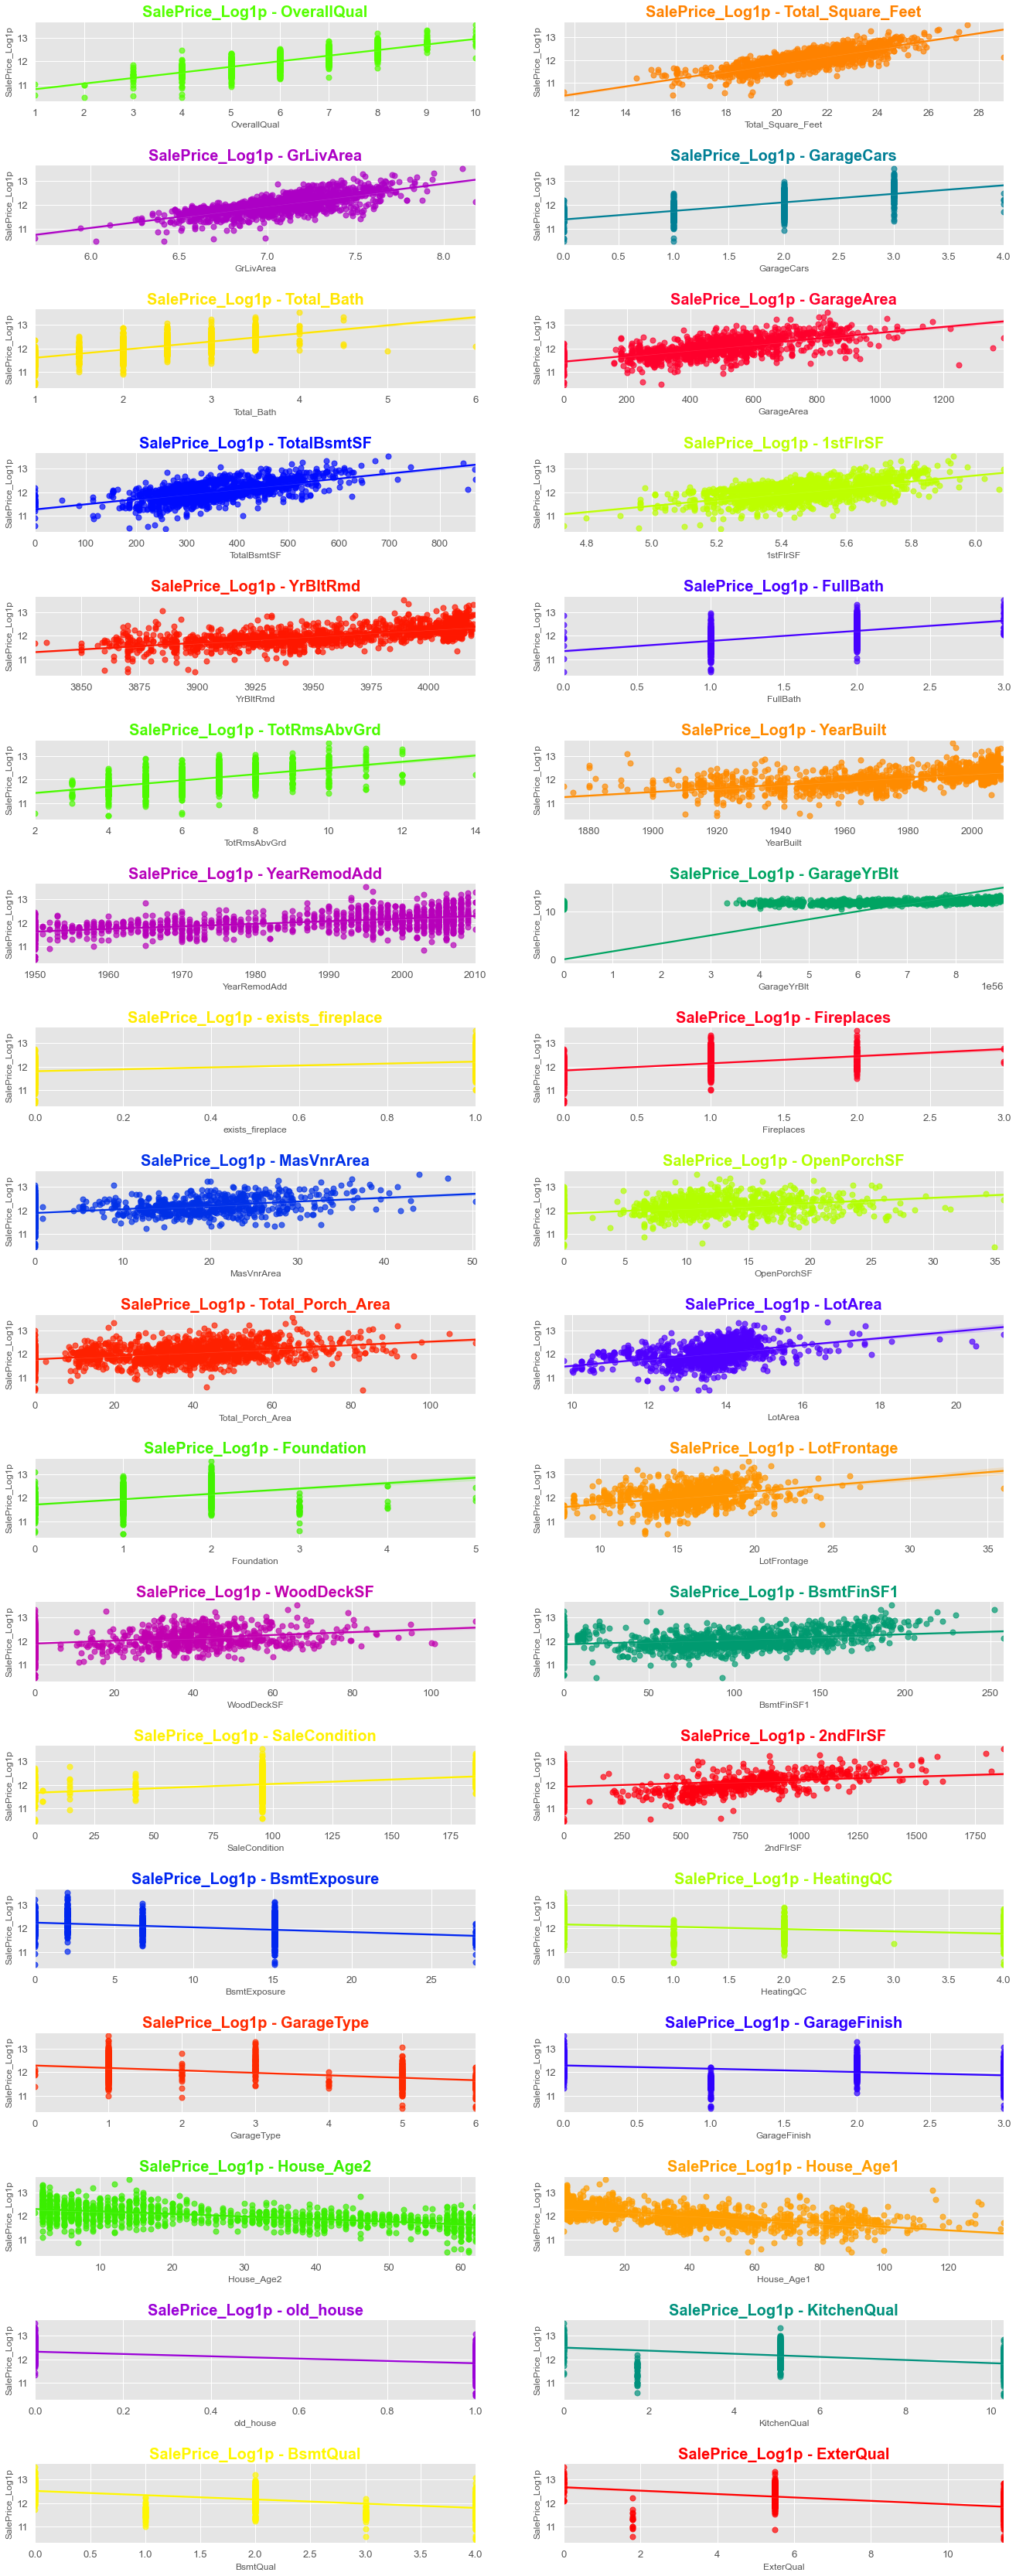

In [73]:
plt.style.use('ggplot')
fig, axes = plt.subplots(18, 2,figsize=(20,60))
fig.subplots_adjust(hspace=0.8)
sns.set(font_scale=1.2)
colors=[plt.cm.prism_r(each) for each in np.linspace(0, 1, len(best_columns))]
for i,ax,color in zip(best_columns,axes.flatten(),colors):
    sns.regplot(x=train[i], y=train["SalePrice_Log1p"], fit_reg=True,marker='o',scatter_kws={'s':50,'alpha':0.7},color=color,ax=ax)
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice_Log1p',fontsize=12)
    ax.set_title('SalePrice_Log1p'+' - '+str(i),color=color,fontweight='bold',size=20)

In [74]:
train = train[train['Total_Square_Feet']<28.97]
train = train[train['Total_Bath']<5]
train = train[train['GarageArea']<1248]


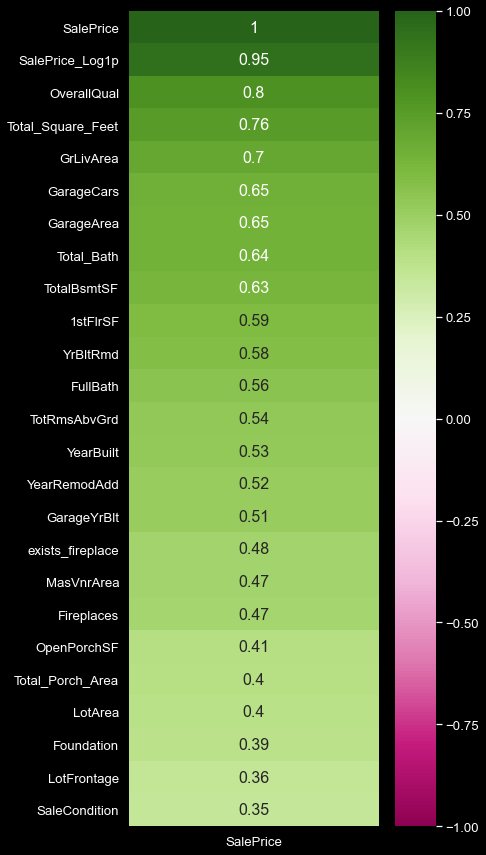

In [75]:
plt.style.use('dark_background')
corr1_new_train=train.corr()
plt.figure(figsize=(5,15))
sns.heatmap(corr1_new_train[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(25),annot_kws={"size": 16},vmin=-1, cmap='PiYG', annot=True)
sns.set(font_scale=2)

In [76]:
del test['SalePrice']

In [77]:
# making X and y
X=train.drop(['SalePrice','SalePrice_Log1p','Classes'],axis=1)
y=train.SalePrice_Log1p

In [78]:
# Finding variables which can create over fitting

def overfit_reducer(df):

    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 99.9:
            overfit.append(i)
    overfit = list(overfit)
    return overfit
overfitted_features = overfit_reducer(X)

In [79]:
overfitted_features

['Utilities', 'PoolArea', 'PoolQC', 'exists_pool', 'exists_IstFl']

In [80]:
### Lets drop them from X and test
X.drop(['Utilities', 'PoolArea', 'PoolQC', 'exists_pool', 'exists_IstFl'], axis=1, inplace = True)
test.drop(['Utilities', 'PoolArea', 'PoolQC', 'exists_pool', 'exists_IstFl'], axis=1, inplace = True)

In [81]:
print(X.shape)
print(test.shape)

(1447, 87)
(1459, 87)


In [82]:
### Scaling
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,PowerTransformer

std_scaler=StandardScaler()
rbst_scaler=RobustScaler()
power_transformer=PowerTransformer()
X_std=std_scaler.fit_transform(X)
X_rbst=rbst_scaler.fit_transform(X)
X_pwr=power_transformer.fit_transform(X)

test_std=std_scaler.transform(test)
test_rbst=rbst_scaler.transform(test)
test_pwr=power_transformer.transform(test)

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.2,random_state=52)
print('X_train Shape :',X_train.shape)
print('X_test Shape :',X_test.shape)
print('y_train Shape :',y_train.shape)
print('y_test Shape :',y_test.shape)

X_train Shape : (1157, 87)
X_test Shape : (290, 87)
y_train Shape : (1157,)
y_test Shape : (290,)


In [86]:
# Import common MLA libraries
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier, XGBRegressor
from sklearn.neural_network import MLPRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor,StackingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [104]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [105]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [106]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, 
                                              alphas=alphas2, 
                                              random_state=42, 
                                              cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [107]:
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, 
                                max_features='sqrt', min_samples_leaf=15, min_samples_split=10,
                                loss='huber', random_state =42)


In [108]:
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

In [109]:
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [110]:
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, xgboost),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [113]:
# Regression problem

MLA = [ ridge, lasso, elasticnet, svr,  xgboost, gbr,stack_gen  ]

In [114]:
#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy', 'MLA Test Accuracy', 'MLA RMSE', 'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0


for alg in MLA:
    #index through MLA and save performance to table
    
    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model
    fitted_alg = alg.fit(X_train, y_train)
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = fitted_alg.score(X_train, y_train)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = fitted_alg.score(X_test, y_test)
    #MLA_compare.loc[row_index, 'MLA Time'] = fitted_alg.fit_time(X_test, y_test)
    """cv_results['fit_time'].mean()"""
    # RMSE score
    MLA_compare.loc[row_index, 'MLA RMSE'] = np.sqrt(mean_squared_error(y_test, alg.predict(X_test)))
    
    row_index+=1

    
#print and sort table
MLA_compare.sort_values(by = ['MLA RMSE'], ascending = True, inplace = True)
MLA_compare

MLA Name  \
6        StackingCVRegressor   
5  GradientBoostingRegressor   
4               XGBRegressor   
3                   Pipeline   
1                   Pipeline   
2                   Pipeline   
0                   Pipeline   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [117]:
# predicting test data with all these models


test_pred_stack=stack_gen.predict(test_std)
test_pred_gb=gbr.predict(test_std)
test_pred_elastic=elasticnet.predict(test_std)
test_pred_ridge= ridge.predict(test_std)
test_pred_lasso=lasso.predict(test_std)
test_pred_svr=svr.predict(test_std)
test_pred_xgb=xgboost.predict(test_std)

In [120]:
# making dataframe with these predictions
test_pred_xgb=pd.DataFrame(test_pred_xgb,columns=['SalePrice'])
test_pred_gb=pd.DataFrame(test_pred_gb,columns=['SalePrice'])
test_pred_elastic=pd.DataFrame(test_pred_elastic,columns=['SalePrice'])
test_pred_ridge=pd.DataFrame(test_pred_ridge,columns=['SalePrice'])
test_pred_lasso=pd.DataFrame(test_pred_lasso,columns=['SalePrice'])
test_pred_stack=pd.DataFrame(test_pred_stack,columns=['SalePrice'])
test_pred_svr=pd.DataFrame(test_pred_svr,columns=['SalePrice'])

In [121]:
# getting anti log (to get Sale Price)
test_pred_xgb.SalePrice =np.floor(np.expm1(test_pred_xgb.SalePrice))
test_pred_gb.SalePrice =np.floor(np.expm1(test_pred_gb.SalePrice))
test_pred_elastic.SalePrice =np.floor(np.expm1(test_pred_elastic.SalePrice))
test_pred_ridge.SalePrice =np.floor(np.expm1(test_pred_ridge.SalePrice))
test_pred_lasso.SalePrice =np.floor(np.expm1(test_pred_lasso.SalePrice))
test_pred_stack.SalePrice =np.floor(np.expm1(test_pred_stack.SalePrice))
test_pred_svr.SalePrice =np.floor(np.expm1(test_pred_svr.SalePrice))

In [122]:
# taking average of all models
final_pred=(test_pred_stack+test_pred_xgb+test_pred_ridge+test_pred_gb + test_pred_elastic + test_pred_lasso+ test_pred_svr)/7
final_pred.head()

SalePrice
0  123847.000000
1  161539.285714
2  183814.428571
3  197393.000000
4  184993.714286

In [123]:
#Lets check accuracy on test data of kaggle by submitting predictions in form of submission file

temp = pd.DataFrame(pd.read_csv("/Users/tuktuk/Downloads/house-prices-advanced-regression-techniques/test.csv")['Id'])
temp['SalePrice'] = final_pred
temp.to_csv("/Users/tuktuk/Downloads/house-prices-advanced-regression-techniques/submission25Sep1.csv", index = False)

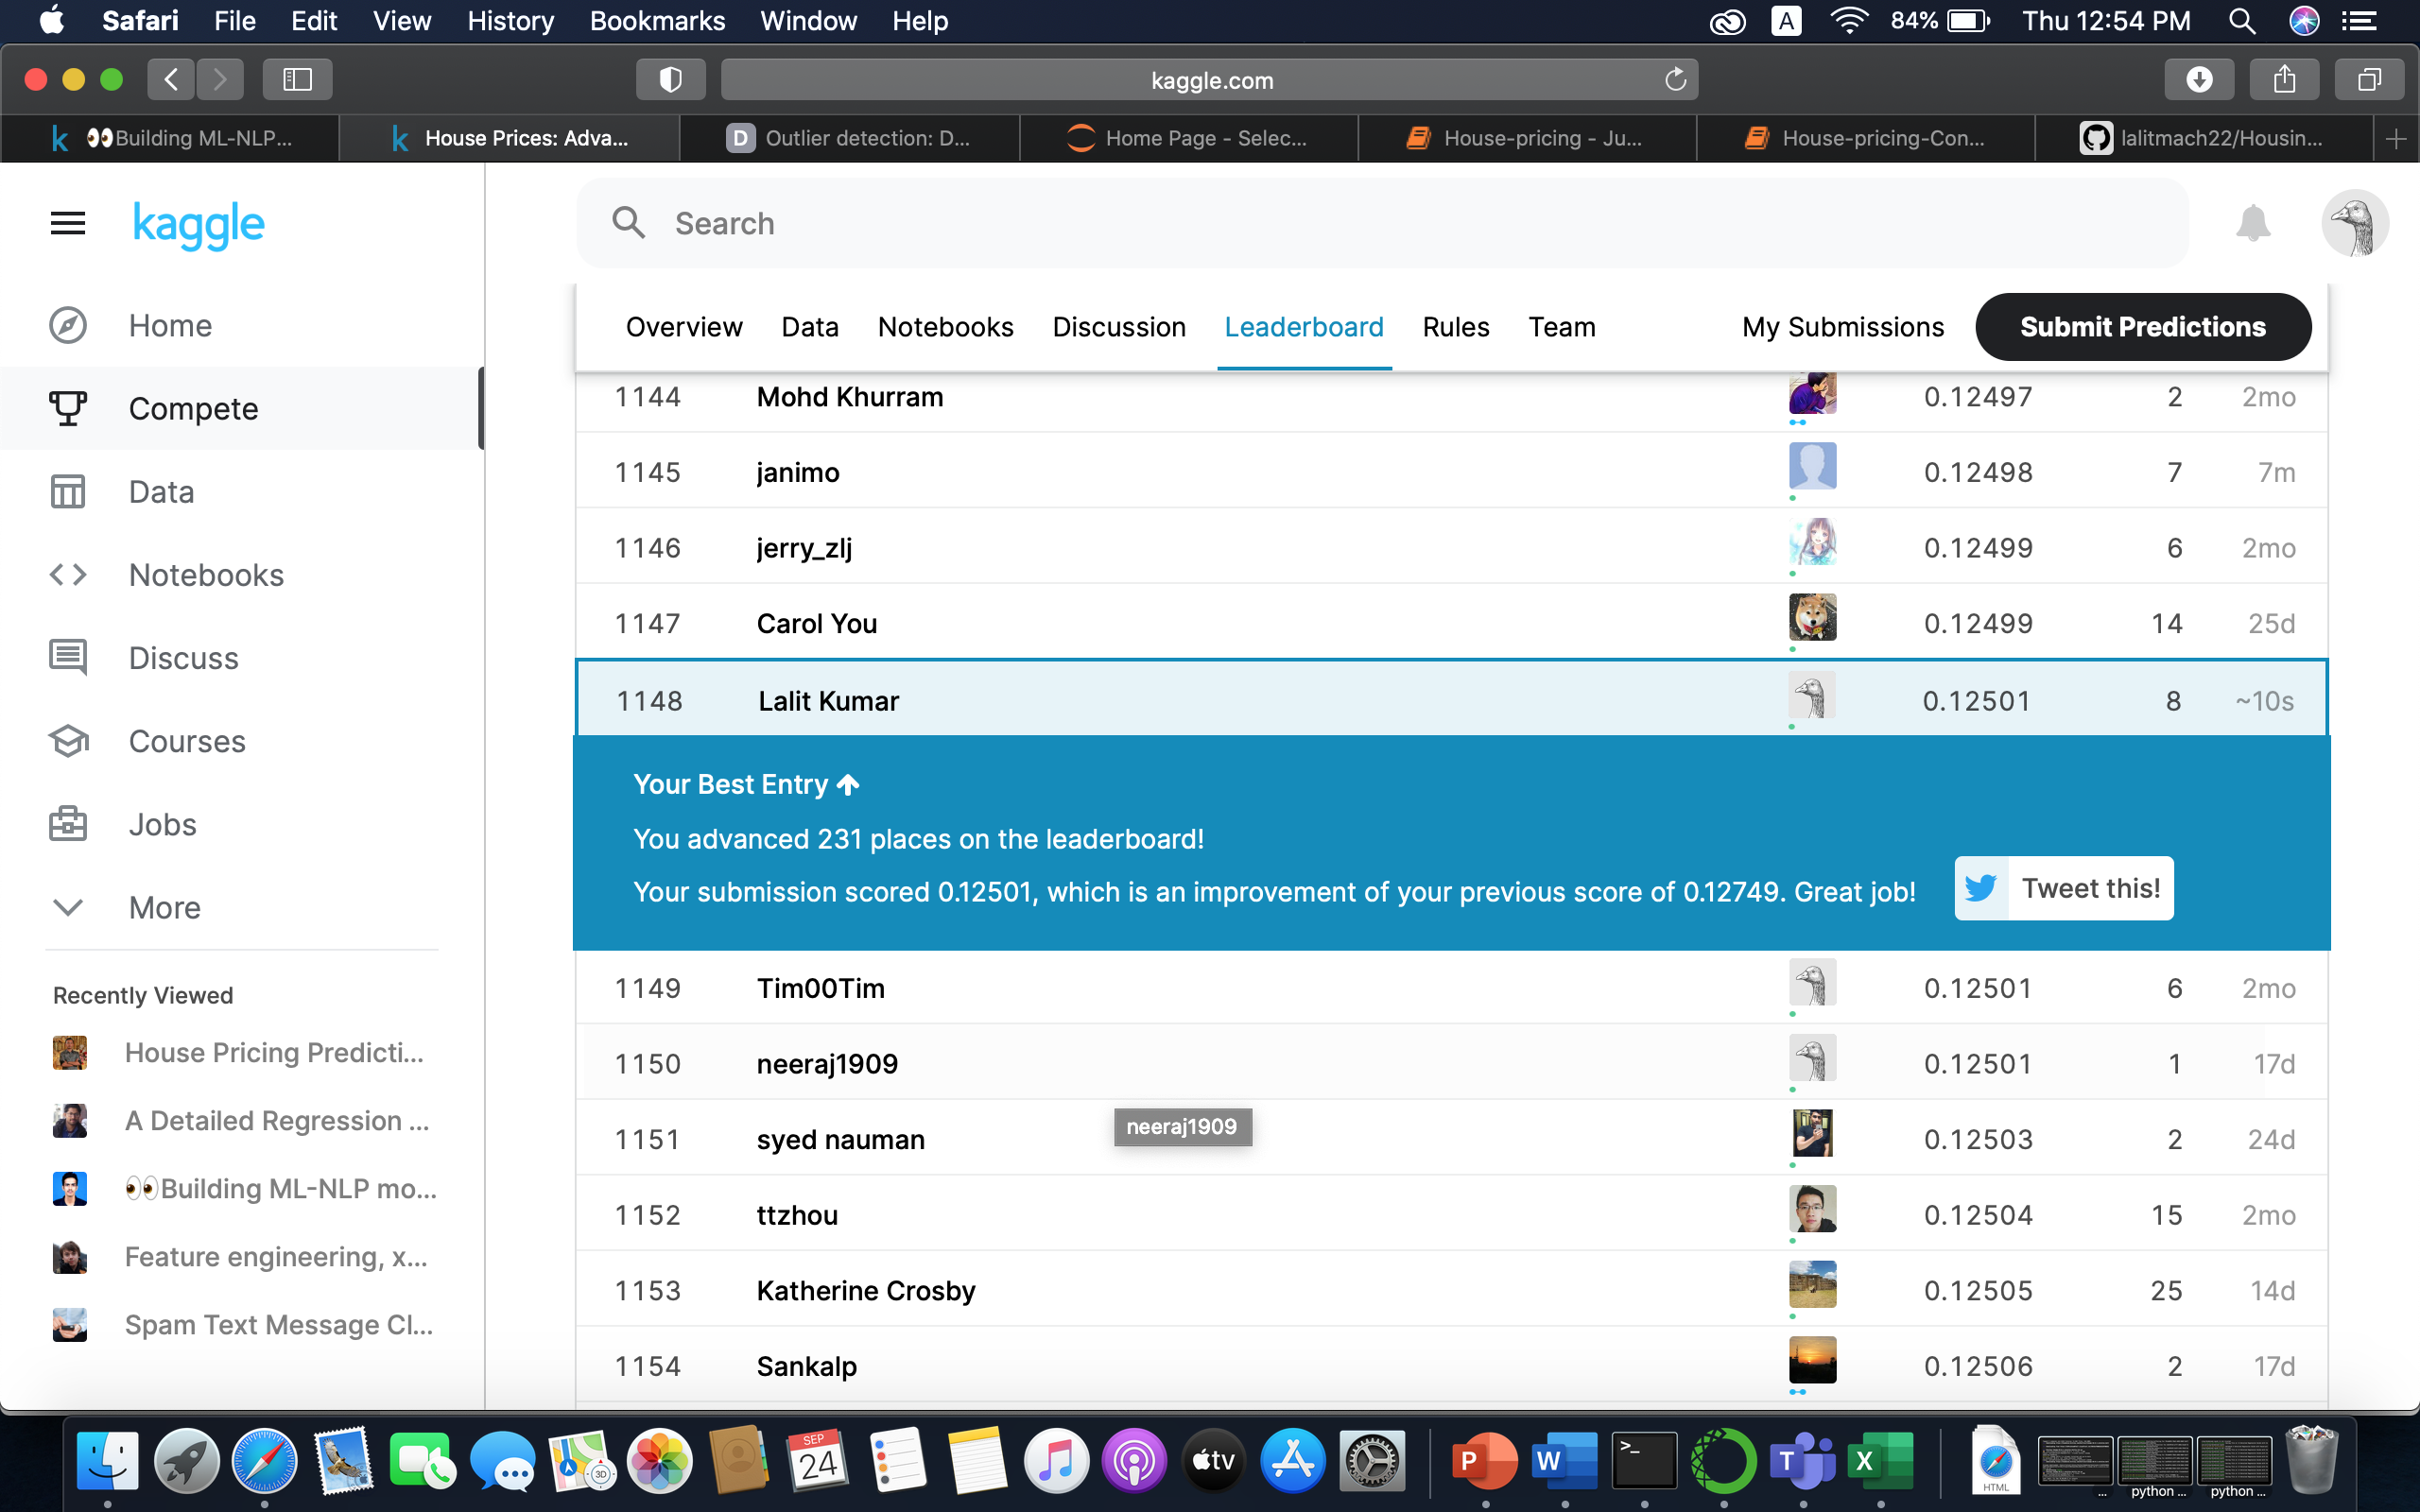

In [126]:
from IPython.display import Image
Image('/Users/tuktuk/Desktop/Screenshot 2020-09-24 at 12.54.56 PM.png')
# Improved score